## 保险业经营情况表2009-2018 数据展示

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import re
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


### Data Sample
![A sample of data](https://gitee.com/jiangdawang/pic/raw/master/20211212202647.png)

#### 数据预处理

##### #读取数据

In [2]:
import os,sys
os.listdir()

['.ipynb_checkpoints',
 'data_handler.ipynb',
 'data_handler_julia.ipynb',
 'month_data.csv',
 'visualization.ipynb',
 'viz_provincial.ipynb']

In [3]:

#data = pd.read_csv('../data/industry_data.csv')
#data.info()

In [3]:
data = pd.read_csv("/mnt/c/data_science/Insurance_report/data/09-21_total_without_note.csv",parse_dates=['date1'])
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date1                153 non-null    datetime64[ns]
 1   info                 153 non-null    object        
 2   原保险保费收入              153 non-null    float64       
 3   原保险保费收入_财产险          153 non-null    float64       
 4   原保险保费收入_人身险          153 non-null    float64       
 5   原保险保费收入_人身险_寿险       153 non-null    float64       
 6   原保险保费收入_人身险_健康险      153 non-null    float64       
 7   原保险保费收入_人身险_人身意外伤害险  153 non-null    float64       
 8   原保险赔付支出              153 non-null    float64       
 9   原保险赔付支出_财产险          153 non-null    float64       
 10  原保险赔付支出_人身险          153 non-null    float64       
 11  原保险赔付支出_人身险_寿险       153 non-null    float64       
 12  原保险赔付支出_人身险_健康险      153 non-null    float64       
 13  原保险赔付支出_人身险_人身意外伤害险  153 non-null  

date1              info     原保险保费收入  原保险保费收入_财产险  原保险保费收入_人身险  \
0 2009-01-01    2009年1月保险业经营数据  11476413.2    2973274.4    8503138.8   
1 2009-02-01  2009年1-2月保险业经营数据  21231670.6    4649354.7   16582315.9   
2 2009-03-01  2009年1-3月保险业经营数据  32767025.6    7185819.9   25581205.7   
3 2009-04-01  2009年1-4月保险业经营数据  41404593.3    9827050.2   31577543.1   
4 2009-05-01  2009年1-5月保险业经营数据  49504913.9   12089320.6   37415593.2   

   原保险保费收入_人身险_寿险  原保险保费收入_人身险_健康险  原保险保费收入_人身险_人身意外伤害险     原保险赔付支出  \
0       7834667.9         488045.6             180425.3   2837258.6   
1      15443030.8         815765.3             323519.7   5285888.7   
2      23589945.9        1403958.6             587301.1   8235800.2   
3      28972789.4        1827127.8             777625.9  10773711.4   
4      34211170.4        2252622.3             951800.6  13081729.5   

   原保险赔付支出_财产险  原保险赔付支出_人身险  原保险赔付支出_人身险_寿险  原保险赔付支出_人身险_健康险  \
0    1251807.8    1585450.8       1344880.2         183986.7   
1    2271490.1    3014398.7       2577771.2         338816.9   
2    3514472.2    4721328.1       4029203.3         540848.1   
3    4790724.2    5982987.2       5084159.2         696254.1   
4    5913100.9    7168628.5       6071939.2         847939.5   

   原保险赔付支出_人身险_人身意外伤害险     业务及管理费         银行存款           投资         资产总额  
0              56583.9   837728.0   81948010.7  223636240.8  338154395.5  
1              97810.6  1678057.0   88846207.8  220627736.0  342091505.5  
2             151276.7  2617023.4  100047101.3  221784969.6  354347298.0  
3             202574.0  3524507.8  103943128.7  220258335.0  355455087.2  
4             248749.8  4404294.2  105293958.2  224736995.1  361956016.4

##### 替换中文符号

In [5]:
columns = data.columns.to_list()
columns = [re.sub('_\d、','',x) for x in columns]
columns = [re.sub('_（\d）','',x) for x in columns]
columns
data.columns = columns

In [6]:
def create_nan_2015(x):
    tmp = {}
    for i in data.columns:
        if i == 'Year':
            tmp[i] = 2015
        elif i == 'Month':
            tmp[i] = f'1-{x}'
        elif i == 'date_time':
            tmp[i] = f'2011年1-{x}月'
        else:
            tmp[i] = np.nan
    return tmp

In [7]:
def create_nan_2011(x):
    tmp = {}
    for i in data.columns:
        if i == 'Year':
            tmp[i] = 2011
        elif i == 'Month':
            tmp[i] = f'1-{x}'
        elif i == 'date_time':
            tmp[i] = f'2011年1-{x}月'
        else:
            tmp[i] = np.nan
    return tmp

##### 正则读取月份年份

In [4]:
data['Year'] = data.date1.dt.year
data['Month'] = data.date1.dt.month
data.head()

date1              info     原保险保费收入  原保险保费收入_财产险  原保险保费收入_人身险  \
0 2009-01-01    2009年1月保险业经营数据  11476413.2    2973274.4    8503138.8   
1 2009-02-01  2009年1-2月保险业经营数据  21231670.6    4649354.7   16582315.9   
2 2009-03-01  2009年1-3月保险业经营数据  32767025.6    7185819.9   25581205.7   
3 2009-04-01  2009年1-4月保险业经营数据  41404593.3    9827050.2   31577543.1   
4 2009-05-01  2009年1-5月保险业经营数据  49504913.9   12089320.6   37415593.2   

   原保险保费收入_人身险_寿险  原保险保费收入_人身险_健康险  原保险保费收入_人身险_人身意外伤害险     原保险赔付支出  \
0       7834667.9         488045.6             180425.3   2837258.6   
1      15443030.8         815765.3             323519.7   5285888.7   
2      23589945.9        1403958.6             587301.1   8235800.2   
3      28972789.4        1827127.8             777625.9  10773711.4   
4      34211170.4        2252622.3             951800.6  13081729.5   

   原保险赔付支出_财产险  原保险赔付支出_人身险  原保险赔付支出_人身险_寿险  原保险赔付支出_人身险_健康险  \
0    1251807.8    1585450.8       1344880.2         183986.7   
1    2271490.1    3014398.7       2577771.2         338816.9   
2    3514472.2    4721328.1       4029203.3         540848.1   
3    4790724.2    5982987.2       5084159.2         696254.1   
4    5913100.9    7168628.5       6071939.2         847939.5   

   原保险赔付支出_人身险_人身意外伤害险     业务及管理费         银行存款           投资         资产总额  \
0              56583.9   837728.0   81948010.7  223636240.8  338154395.5   
1              97810.6  1678057.0   88846207.8  220627736.0  342091505.5   
2             151276.7  2617023.4  100047101.3  221784969.6  354347298.0   
3             202574.0  3524507.8  103943128.7  220258335.0  355455087.2   
4             248749.8  4404294.2  105293958.2  224736995.1  361956016.4   

   Year  Month  
0  2009      1  
1  2009      2  
2  2009      3  
3  2009      4  
4  2009      5

In [9]:
#handle previous version
print(data.shape)
#data.drop('from_url',axis = 1,inplace=True)
data = data.drop_duplicates()
print(data.shape)
#data['date_time'] = data['info'].apply(lambda x: re.findall(r'.*(?=保险.*)',x)[0])
data['date1'] = data['date1'].replace({'2011年': '2011年1-12月',
                            '2012年': '2012年1-12月',
                            '2013年': '2013年1-12月',
                            '2014年': '2014年1-12月',
                            '2015年': '2015年1-12月',
                            '2016年': '2016年1-12月',
                            '2017年': '2017年1-12月',
                            '2011年2月':'2011年1-2月',
                            '2011年3月':'2011年1-3月',
                            '2011年6月':'2011年1-6月',
                            '2011年7月':'2011年1-7月'})

data['Year'] = data.date1.apply(lambda x: int(re.findall(r'\d{4}(?=年)',x)[0]))
data['Month'] = data.date1.apply(lambda x: re.findall(r'(?<=年).*(?=月)',x)[0])
#data.drop('info',inplace= True,axis = 1)
month_cat = ['1'] + [f'1-{i}' for i in range(2,13)]
#data = data.append(create_nan_2011(4),ignore_index=True)
#data = data.append(create_nan_2011(5),ignore_index=True)
#data = data.append(create_nan_2015(2),ignore_index=True)
#data = data.append(create_nan_2015(3),ignore_index=True)
data['Month'] = pd.Categorical(data['Month'],ordered = True,categories=month_cat)           
data = data.sort_values(by=['Year','Month'])

(153, 20)
(153, 20)


TypeError: expected string or bytes-like object

##### 读取所有的浮点型数据并interpolate缺失值

In [5]:
missing_date = pd.date_range('2009-01','2021-11',freq='MS').difference(data.date1)
missing_date

DatetimeIndex(['2015-02-01', '2015-03-01'], dtype='datetime64[ns]', freq=None)

In [6]:
#for i in missing_date 
missing_02_01 = {'date1': pd.to_datetime('2015-02-01'),
                'info': "2015年1-2月情况表",
                '原保险保费收入': np.nan,
                '原保险保费收入_财产险': np.nan,
                '原保险保费收入_人身险': np.nan,
                '原保险保费收入_人身险_寿险': np.nan,
                '原保险保费收入_人身险_健康险': np.nan,
                '原保险保费收入_人身险_人身意外伤害险': np.nan,
                '原保险赔付支出': np.nan,
                '原保险赔付支出_财产险':np.nan,
                '原保险赔付支出_人身险': np.nan,
                '原保险赔付支出_人身险_寿险': np.nan,
                '原保险赔付支出_人身险_健康险': np.nan,
                '原保险赔付支出_人身险_人身意外伤害险': np.nan,
                '业务及管理费': np.nan,
                '银行存款': np.nan,
                '投资': np.nan,
                '资产总额': np.nan,
                'Year': 2015,
                'Month': 2}
missing_03_01 = {'date1': pd.to_datetime('2015-03-01'),
                'info': "2015年1-3月情况表",
                '原保险保费收入': np.nan,
                '原保险保费收入_财产险': np.nan,
                '原保险保费收入_人身险': np.nan,
                '原保险保费收入_人身险_寿险': np.nan,
                '原保险保费收入_人身险_健康险': np.nan,
                '原保险保费收入_人身险_人身意外伤害险': np.nan,
                '原保险赔付支出': np.nan,
                '原保险赔付支出_财产险':np.nan,
                '原保险赔付支出_人身险': np.nan,
                '原保险赔付支出_人身险_寿险': np.nan,
                '原保险赔付支出_人身险_健康险': np.nan,
                '原保险赔付支出_人身险_人身意外伤害险': np.nan,
                '业务及管理费': np.nan,
                '银行存款': np.nan,
                '投资': np.nan,
                '资产总额': np.nan,
                'Year': 2015,
                'Month': 3}

data = data.append(missing_03_01,ignore_index=True)

data = data.append(missing_02_01,ignore_index=True)

data = data.sort_values('date1')
                



In [ ]:
data[data['Year']==2015]

In [12]:
numerical_col = data.select_dtypes(float).columns.tolist()


In [13]:
data[numerical_col] = data[numerical_col].interpolate(method='linear') 

In [15]:

def cal_each_month(group):
    #year = re.findall(r'\d{4}(?=年)',group.loc[0,'date_time'])[0]
    #print(year)
    vals = group.loc[:,numerical_col]
    vals_lag = vals.shift(1).fillna(0)
    rV = vals - vals_lag

    #index = range(1,13)
    #index = [f'{year}/{i}' for i in range(1,13)]
    #rV['dd'] = index
    #columns = numerical_col
    return vals - vals_lag

In [16]:
dd = data.groupby('Year').apply(cal_each_month)

In [7]:
dd['date'] = data.date1

NameError: name 'dd' is not defined

In [19]:
#dd.insert(0,'date',al)
dd['date'] = pd.to_datetime(dd['date'])

In [20]:
dd

原保险保费收入  原保险保费收入_财产险  原保险保费收入_人身险  原保险保费收入_人身险_寿险  原保险保费收入_人身险_健康险  \
0    11476413.2    2973274.4    8503138.8       7834667.9         488045.6   
1     9755257.4    1676080.3    8079177.1       7608362.9         327719.7   
2    11535355.0    2536465.2    8998889.8       8146915.1         588193.3   
3     8637567.7    2641230.3    5996337.4       5382843.5         423169.2   
4     8100320.6    2262270.4    5838050.1       5238381.0         425494.5   
..          ...          ...          ...             ...              ...   
148  28655300.0    8934000.0   19721100.0      13000500.0        5812600.0   
149  30600700.0    8839700.0   21761100.0      15018200.0        5852700.0   
150  34898000.0    9756300.0   25141800.0      16884500.0        6833900.0   
151  25389600.0    8504100.0   16885400.0      11523900.0        4496800.0   
152  25907500.0    9428900.0   16478600.0      11063600.0        4603600.0   

     原保险保费收入_人身险_人身意外伤害险     原保险赔付支出  原保险赔付支出_财产险  原保险赔付支出_人身险  \
0               180425.3   2837258.6    1251807.8    1585450.8   
1               143094.4   2448630.1    1019682.3    1428947.9   
2               263781.4   2949911.5    1242982.1    1706929.4   
3               190324.8   2537911.2    1276252.0    1261659.1   
4               174174.7   2308018.1    1122376.7    1185641.3   
..                   ...         ...          ...          ...   
148             908100.0  13452800.0    6327200.0    7125600.0   
149             890200.0  13818100.0    6940700.0    6877400.0   
150            1423400.0  13338600.0    6653600.0    6685000.0   
151             864700.0  10988600.0    5749800.0    5238800.0   
152             811400.0  13660500.0    7846600.0    5813900.0   

     原保险赔付支出_人身险_寿险  原保险赔付支出_人身险_健康险  原保险赔付支出_人身险_人身意外伤害险     业务及管理费  \
0         1344880.2         183986.7              56583.9   837728.0   
1         1232891.0         154830.2              41226.7   840329.0   
2         1451432.1         202031.2              53466.1   938966.4   
3         1054955.9         155406.0              51297.3   907484.4   
4          987780.0         151685.4              46175.8   879786.4   
..              ...              ...                  ...        ...   
148       2532000.0        4282700.0             310900.0  4060500.0   
149       2801500.0        3786900.0             289000.0  4152000.0   
150       3005500.0        3357500.0             321900.0  4124100.0   
151       2646900.0        2358400.0             233500.0  3907200.0   
152       2420600.0        3085800.0             317500.0  4432300.0   

           银行存款           投资         资产总额       date  
0    81948010.7  223636240.8  338154395.5 2009-01-01  
1     6898197.1   -3008504.8    3937110.0 2009-02-01  
2    11200893.5    1157233.6   12255792.5 2009-03-01  
3     3896027.4   -1526634.6    1107789.2 2009-04-01  
4     1350829.5    4478660.1    6500929.2 2009-05-01  
..          ...          ...          ...        ...  
148  -8349700.0    1687700.0   -5739500.0 2021-07-01  
149   3750000.0   15871500.0   20070500.0 2021-08-01  
150  -1507600.0   14845900.0   18479000.0 2021-09-01  
151  -2084800.0    9412400.0   12231200.0 2021-10-01  
152  -4799900.0   16327300.0   17694500.0 2021-11-01  

[155 rows x 17 columns]

In [13]:
dd = dd.sort_values('date',ascending=True)

In [13]:
len(data)

106

##### 寻找缺失的月份

In [38]:
data.groupby('Year')['原保险保费收入'].count()

Year
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    11
Name: 原保险保费收入, dtype: int64

##### 找到年份数据

In [10]:
#data[Date_Year].date_time.tolist()

### 年份数据图表

#### 保险保费及支出变动 Line Chart

In [ ]:
fig = px.line_polar(data[Date_Year], r='原保险保费收入', theta='month', 

                    color='year', line_close=True, 

                    title='Polar seasonal plot',

                    width=600, height=500)

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                        y=data[Date_Year].原保险保费收入.tolist(),
                        mode='lines',
                        name='原保险保费收入'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出.tolist(),
                mode='lines',
                name = '原保险赔付支出'))

fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_财产险.tolist(),
                mode='lines',
                name = '原保险保费收入_财产险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_人身险.tolist(),
                mode='lines',
                name = '原保险保费收入_人身险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出_财产险.tolist(),
                mode='lines',
                name = '原保险赔付支出_财产险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出_人身险.tolist(),
                mode='lines',
                name = '原保险赔付支出_人身险'))

                
fig.update_layout(title = '保险保费及支出变动', xaxis_title='Year',yaxis_title='费用/支出')
fig.show()

#### 保险保费及支出变动细分 Line Chart

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_人身险.tolist(),
                mode='lines',
                name = '原保险保费收入_人身险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出_人身险.tolist(),
                mode='lines',
                name = '原保险赔付支出_人身险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_人身险_寿险.tolist(),
                mode='lines',
                name = '原保险保费收入_人身险_寿险'))

fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出_人身险_寿险.tolist(),
                mode='lines',
                name = '原保险赔付支出_人身险_寿险'))

fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_人身险_健康险.tolist(),
                mode='lines',
                name = '原保险保费收入_人身险_健康险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出_人身险_健康险.tolist(),
                mode='lines',
                name = '原保险赔付支出_人身险_健康险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_人身险_人身意外伤害险.tolist(),
                mode='lines',
                name = '原保险保费收入_人身险_人身意外伤害险'))

fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),

                y=data[Date_Year].原保险赔付支出_人身险_人身意外伤害险.tolist(),
                mode='lines',
                name = '原保险赔付支出_人身险_人身意外伤害险'))

fig.update_layout(title = '保险保费及支出变动细分', xaxis_title='Year',yaxis_title='费用/支出')
fig.show()


#### 原保险保费收入_财产险占比 Vs 原保险保费收入_人身险占比 Bar Chart

In [25]:
data_Year = data[Date_Year].copy()

In [26]:
data_Year['原保险保费收入_财产险占比'] = data_Year['原保险保费收入_财产险']/ data_Year['原保险保费收入']
data_Year['原保险保费收入_人身险占比'] = data_Year['原保险保费收入_人身险']/ data_Year['原保险保费收入']
data_Year['原保险赔付支出_财产险占比'] = data_Year['原保险赔付支出_财产险']/ data_Year['原保险赔付支出']
data_Year['原保险赔付支出_人身险占比'] = data_Year['原保险赔付支出_人身险']/ data_Year['原保险赔付支出']

In [27]:
dict(zip(range(0,12),range(2009,2021)))

{0: 2009,
 1: 2010,
 2: 2011,
 3: 2012,
 4: 2013,
 5: 2014,
 6: 2015,
 7: 2016,
 8: 2017,
 9: 2018,
 10: 2019,
 11: 2020}

Text(0.5, 1.0, 'Recent Year Property Insurance Vs Individual Insurance')

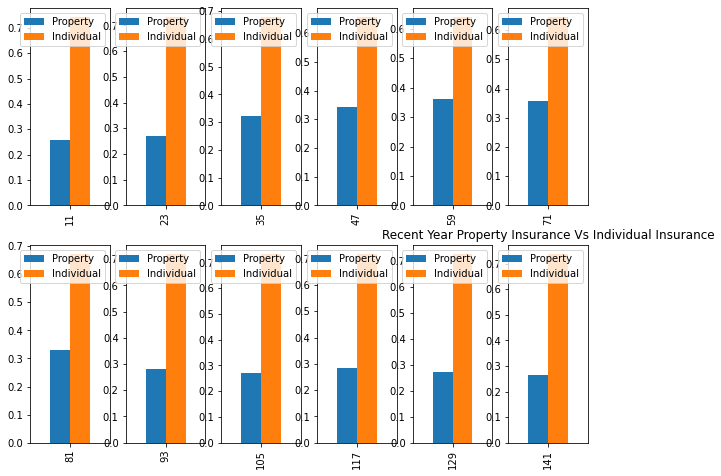

In [28]:
Year_dict = dict(zip(range(0,12),range(2009,2021)))
fig, axes = plt.subplots(2,6,figsize = (10,8))
for i in range(0,12):
    if i < 6:
        data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险保费收入_财产险占比','原保险保费收入_人身险占比']].plot(kind='bar',ax = axes[0,i]);
        axes[0,i].legend(['Property','Individual'])
    else:
        data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险保费收入_财产险占比','原保险保费收入_人身险占比']].plot(kind='bar',ax=axes[1,i-6]);
        axes[1,i-6].legend(['Property','Individual'])
plt.title('Recent Year Property Insurance Vs Individual Insurance')

In [29]:

from plotly.subplots import make_subplots


fig = make_subplots(
    rows=2, cols=6,
    column_widths=[0.5]*6,
    row_heights=[0.5]*2,
    specs=[[{"type": "bar"}, {"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}],
           [{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"} ,{"type": "bar"}]])
tra_ls = []
for i in range(6):
    x = ['财产险占比','人身险占比']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险保费收入_财产险占比','原保险保费收入_人身险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y, showlegend=True,text=y,name= Year_dict[i]),
    row=1, col =i+1
)

for i in range(6,12):
    x = ['财产险占比','人身险占比']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险保费收入_财产险占比','原保险保费收入_人身险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y, showlegend=True,text=y,name=Year_dict[i]
        ),
    row=2, col = i-5
    )
fig.update_layout(title = '原保险保费收入_财产险占比 Vs 原保险保费收入_人身险占比')
fig.show()


In [30]:
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=2, cols=6,
    column_widths=[0.5]*6,
    row_heights=[0.5]*2,
    specs=[[{"type": "bar"}, {"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}],
           [{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}, {"type": "bar"},{"type": "bar"}]])
tra_ls = []
for i in range(6):
    x = ['财产险占比','人身险占比']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险赔付支出_财产险占比','原保险赔付支出_人身险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y,text=y,showlegend=True,name= Year_dict[i]),
    row=1, col =i+1
)

for i in range(6,12):
    x = ['财产险占比','人身险占比']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险赔付支出_财产险占比','原保险赔付支出_人身险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y, text=y,showlegend=True,name=Year_dict[i]
        ),
    row=2, col = i-5
    )
fig.update_layout(title = '原保险赔付支出_财产险占比 Vs 原保险赔付支出_人身险占比')
fig.show()


#### 原保险保费收入-人身险细分 Bar Chart

In [31]:
data_Year['收入_寿险占比'] = data_Year['原保险保费收入_人身险_寿险']/ data_Year['原保险保费收入_人身险']
data_Year['收入_健康险占比'] = data_Year['原保险保费收入_人身险_健康险']/ data_Year['原保险保费收入_人身险']
data_Year['收入_人身意外伤害险占比'] = data_Year['原保险保费收入_人身险_人身意外伤害险']/ data_Year['原保险保费收入_人身险']
data_Year['赔付_寿险占比'] = data_Year['原保险赔付支出_人身险_寿险']/ data_Year['原保险赔付支出_人身险']
data_Year['赔付_健康险占比'] = data_Year['原保险赔付支出_人身险_健康险']/ data_Year['原保险赔付支出_人身险']
data_Year['赔付_人身险占比'] = data_Year['原保险赔付支出_人身险_人身意外伤害险']/ data_Year['原保险赔付支出_人身险']

In [32]:
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=2, cols=6,
    column_widths=[0.5]*6,
    row_heights=[0.5]*2,
    specs=[[{"type": "bar"}, {"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}],
           [{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}, {"type": "bar"},{"type": "bar"}]])
tra_ls = []
for i in range(6):
    x = ['寿险','人身险','人身意外伤害险']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['收入_寿险占比','收入_健康险占比', '收入_人身意外伤害险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y,text=y ,showlegend=True,name= Year_dict[i]),
    row=1, col =i+1
)

for i in range(6,12):
    x = ['寿险','人身险','人身意外伤害险']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['收入_寿险占比','收入_健康险占比', '收入_人身意外伤害险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y,text=y,showlegend=True,name=Year_dict[i]
        ),
    row=2, col = i-5
    )
fig.update_layout(title = '原保险保费收入-人身险')
fig.show()


#### 原保险赔付支出-人身险细分 Bar Chart

In [33]:
dic = {i:3 for i in ['收入_寿险占比','收入_健康险占比', '收入_人身意外伤害险占比', '赔付_寿险占比', '赔付_健康险占比', '赔付_人身险占比']}
d2 = data_Year.round(dic)


In [34]:
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=2, cols=6,
    column_widths=[0.5]*6,
    row_heights=[0.5]*2,
    specs=[[{"type": "bar"}, {"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}],
           [{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}, {"type": "bar"},{"type": "bar"}]])

for i in range(6):
    x = ['寿险','人身险','人身意外伤害险']
    y = d2[d2['Year']==Year_dict[i]].loc[:,['赔付_寿险占比', '赔付_健康险占比', '赔付_人身险占比']].squeeze(axis = 0).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y, showlegend=True,text=y,name= Year_dict[i]),
    row=1, col =i+1
)

for i in range(6,12):
    x = ['寿险','人身险','人身意外伤害险']
    y = d2[d2['Year']==Year_dict[i]].loc[:,['赔付_寿险占比', '赔付_健康险占比', '赔付_人身险占比']].squeeze(axis = 0).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y, showlegend=True,text=y,name=Year_dict[i]
        ),
    row=2, col = i-5
    )
fig.update_layout(title = '原保险赔付支出-人身险')
fig.show()


In [36]:
dd.to_csv("month_data.csv")

In [29]:
#(data[data['Year']== 2009]['原保险保费收入'].reset_index(drop=True) - data[data['Year']== 2009]['原保险保费收入'].reset_index(drop=True).shift(1)).plot()

### 每月数据（对数据完整的年份）

#### 每月数据对比-->探究季节性

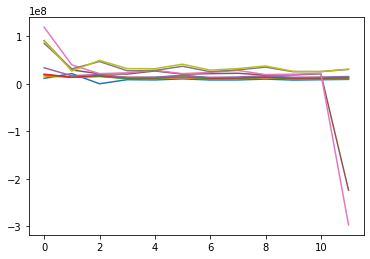

In [42]:
fig,ax = plt.subplots(1,1)
for i in range(2009,2021):
    if i not in [2011,2015,2018]:
        (data[data['Year']== i]['原保险保费收入'].reset_index(drop=True) - data[data['Year']== i]['原保险保费收入'].reset_index(drop=True).shift(1).fillna(0)).plot(ax=ax)

In [38]:
fig = go.Figure()
for i in range(2009,2021):
    if i not in [2015]: 
        x = list(range(1,13))
        y = (data[data['Year']== i]['原保险保费收入'].reset_index(drop=True) - data[data['Year']== i]['原保险保费收入'].reset_index(drop=True).shift(1).fillna(0)).tolist()
        fig.add_trace(go.Scatter(x=x,
                        y=y,
                        mode='lines',
                        name = f'{i} 年'))
fig.update_layout(title = '原保费收入（1-12月）', xaxis_title='月份',yaxis_title='收入')
fig.show()

In [39]:
fig = go.Figure()
for i in range(2009,2021):
    if i not in [2015]: 
        x = list(range(1,13))
        y = (data[data['Year']== i]['原保险赔付支出'].reset_index(drop=True) - data[data['Year']== i]['原保险赔付支出'].reset_index(drop=True).shift(1).fillna(0)).tolist()
        fig.add_trace(go.Scatter(x=x,
                        y=y,
                        mode='lines',
                        name = f'{i} 年'))
fig.update_layout(title = '原赔偿支出（1-12月）', xaxis_title='月份',yaxis_title='费用')
fig.show()

In [40]:
fig = make_subplots(
    rows=2, cols=1,
    column_widths=[0.8],
    row_heights=[1]*2,
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}]])

for i in range(2009,2021):
    if i not in [2015]: 
        x = list(range(1,13))
        y = (data[data['Year']== i]['原保险保费收入'].reset_index(drop=True) - data[data['Year']== i]['原保险保费收入'].reset_index(drop=True).shift(1).fillna(0)).tolist()
        fig.add_trace(go.Scatter(x=x,
                        y=y,
                        mode='lines',
                        name = f'{i} 年收入'),row=1, col = 1)
        #x = list(range(1,13))
        y = (data[data['Year']== i]['原保险赔付支出'].reset_index(drop=True) - data[data['Year']== i]['原保险赔付支出'].reset_index(drop=True).shift(1).fillna(0)).tolist()
        fig.add_trace(go.Scatter(x=x,
                        y=y,
                        mode='lines',
                        name = f'{i} 年赔偿'),row=2, col = 1)
fig.update_layout(title = '原赔偿支出/收入（1-12月）')
fig.show()

In [24]:
fig = px.line_polar(dd, r='原保险保费收入', theta='Month', 
                    color='Year', line_close=True, 
                    title='Polar seasonal plot',
                    width=600, height=500)
fig.show()

### 半年数据图表（1-6月 & 1-12月）数据

In [41]:
#data_half = data.query("Month in ['1-6','1-12']").reset_index(drop = True)
data_half = data[data['Month'].isin([6,12])]

#### 每年上半年下半年的保费差异 

In [42]:
data_half_diff = data_half.groupby('Year').apply(cal_each_month)
data_half_diff['date'] = data_half.date1

In [44]:
tmp = data_half_diff.set_index('date')[['原保险保费收入']].pct_change().fillna(0).reset_index()
fig = make_subplots(
    rows=2, cols=1,
    column_widths=[0.8],
    row_heights=[1]*2,
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}]])

fig.add_trace(go.Scatter(x = data_half_diff['date'].tolist(),
                         y =  data_half_diff['原保险保费收入'].pct_change().fillna(0).tolist(),
                         mode = 'lines', name = '原保险保费收入'),
                         row=1, col = 1)

fig.add_trace(go.Scatter(x = data_half_diff['date'].tolist(),
                         y =  data_half_diff['原保险赔付支出'].pct_change().fillna(0).tolist(),
                         mode = 'lines', name = '原保险赔付支出'),
                         row=1, col = 1)
#fig.update_layout(title = '原保险保费收入 Vs 原保险赔付支出前半年和后半年变化对比',xaxis_title='Year',yaxis_title= '百分比变化')     
fig.add_trace(go.Scatter(x = data_half_diff['date'].tolist(),
                         y = (tmp['原保险保费收入']+1).cumprod().tolist(),
                         mode = 'lines', name = '原保险保费收入总变化'),
                         row=2, col = 1)

fig.add_trace(go.Scatter(x = data_half_diff['date'].tolist(),
                         y = (data_half_diff['原保险赔付支出'].pct_change().fillna(0)+1).cumprod().tolist(),
                         mode = 'lines', name = '原保险赔付支出总变化'),
                         row=2, col = 1)

fig.update_layout(title = '原保险保费收入 Vs 原保险赔付支出前半年和后半年变化对比',
                  xaxis = dict(title='Year'),yaxis= dict(title='百分比变化'),
                  xaxis2 = dict(title='Year'),yaxis2= dict(title='总变化'))    

fig.show()


可以看出在前半年的保费收入和赔偿都要多于后半年，存在较强的周期性

### Using Time Series Analysis to investigate monthly data

In [27]:
from statsmodels.tsa.api import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_yearly, add_changepoints_to_plot
from prophet import Prophet 

In [57]:
from pmdarima.arima import auto_arima
from pmdarima import pipeline
from pmdarima import model_selection
from pmdarima import preprocessing as ppc
from pmdarima import arima


In [21]:
dd.date.dt.month_name()

0        January
1       February
2          March
3          April
4            May
         ...    
148         July
149       August
150    September
151      October
152     November
Name: date, Length: 155, dtype: object

In [22]:
dd = pd.read_csv("month_data.csv",index_col=0)
dd['date'] = pd.to_datetime(dd['date'])
dd['Year']= dd.date.dt.year
dd['Month']= dd.date.dt.month_name()

In [13]:
dd.head()


原保险保费收入  原保险保费收入_财产险  原保险保费收入_人身险  原保险保费收入_人身险_寿险  原保险保费收入_人身险_健康险  \
0  11476413.2    2973274.4    8503138.8       7834667.9         488045.6   
1   9755257.4    1676080.3    8079177.1       7608362.9         327719.7   
2  11535355.0    2536465.2    8998889.8       8146915.1         588193.3   
3   8637567.7    2641230.3    5996337.4       5382843.5         423169.2   
4   8100320.6    2262270.4    5838050.1       5238381.0         425494.5   

   原保险保费收入_人身险_人身意外伤害险    原保险赔付支出  原保险赔付支出_财产险  原保险赔付支出_人身险  原保险赔付支出_人身险_寿险  \
0             180425.3  2837258.6    1251807.8    1585450.8       1344880.2   
1             143094.4  2448630.1    1019682.3    1428947.9       1232891.0   
2             263781.4  2949911.5    1242982.1    1706929.4       1451432.1   
3             190324.8  2537911.2    1276252.0    1261659.1       1054955.9   
4             174174.7  2308018.1    1122376.7    1185641.3        987780.0   

   原保险赔付支出_人身险_健康险  原保险赔付支出_人身险_人身意外伤害险    业务及管理费        银行存款           投资  \
0         183986.7              56583.9  837728.0  81948010.7  223636240.8   
1         154830.2              41226.7  840329.0   6898197.1   -3008504.8   
2         202031.2              53466.1  938966.4  11200893.5    1157233.6   
3         155406.0              51297.3  907484.4   3896027.4   -1526634.6   
4         151685.4              46175.8  879786.4   1350829.5    4478660.1   

          资产总额       date  Year  Month  
0  338154395.5 2009-01-01  2009      1  
1    3937110.0 2009-02-01  2009      2  
2   12255792.5 2009-03-01  2009      3  
3    1107789.2 2009-04-01  2009      4  
4    6500929.2 2009-05-01  2009      5

In [43]:
dd['date'] = pd.to_datetime(dd['date'])
origin_earning = dd.set_index('date')['原保险保费收入'].to_frame()
origin_earning.head()
origin_earning.rename(columns={'原保险保费收入':'total_earning'},inplace=True)

In [44]:
origin_earning['ma_3'] = origin_earning['total_earning'].rolling(window=3).mean()
origin_earning['ma_6'] = origin_earning['total_earning'].rolling(window=6).mean()
origin_earning['ma_12'] = origin_earning['total_earning'].rolling(window=12).mean()


<AxesSubplot:xlabel='date'>

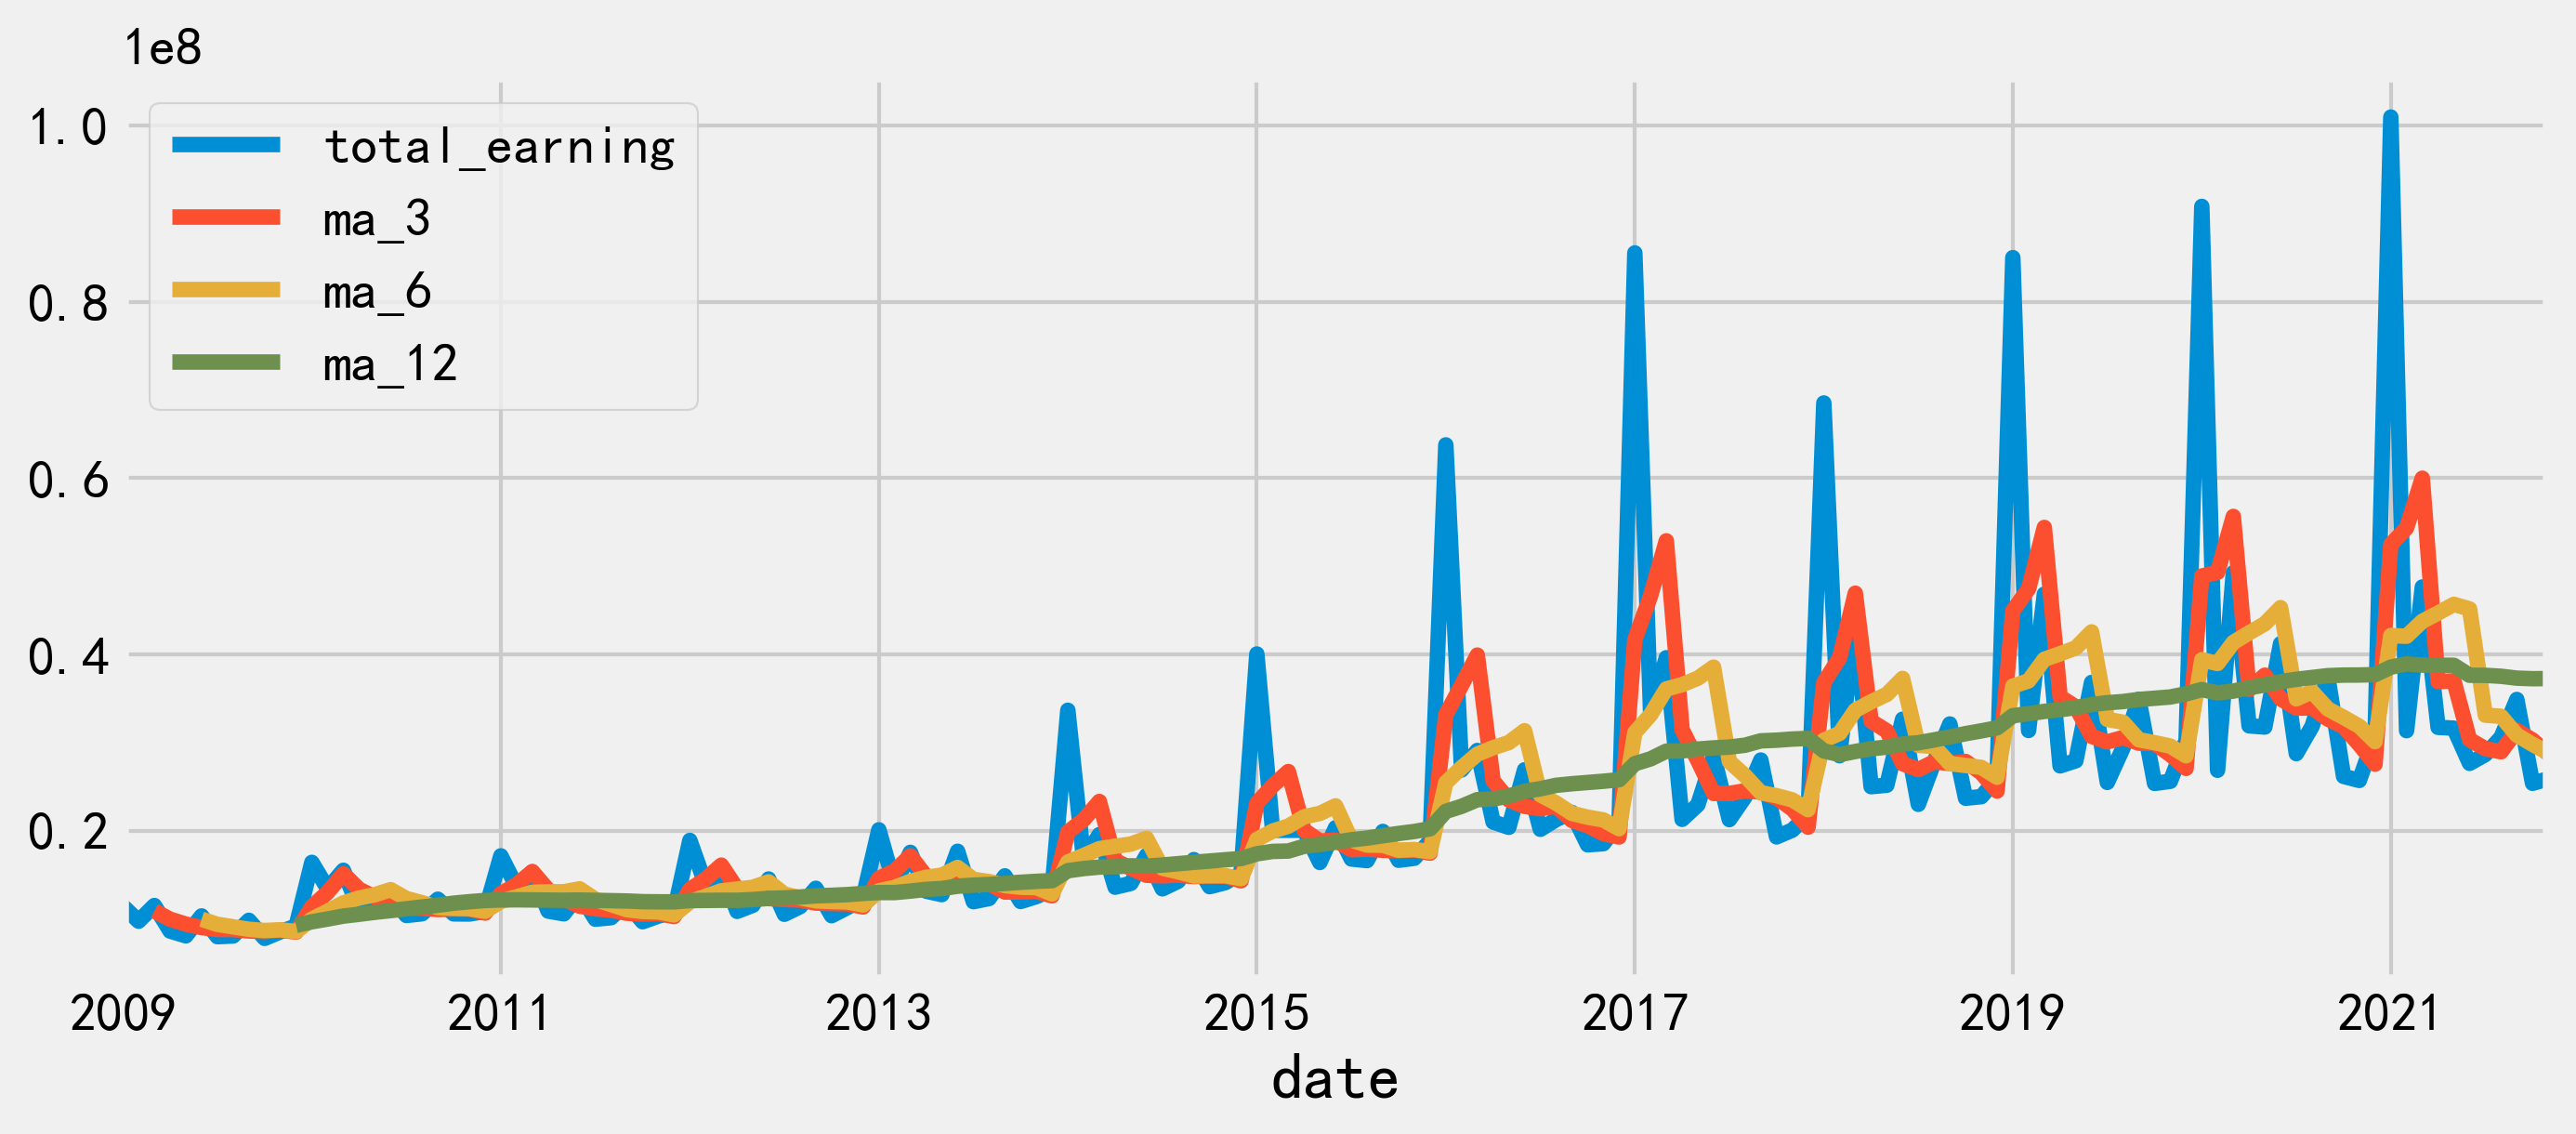

In [29]:
fig,ax=plt.subplots(figsize=(10,4),dpi=300)
origin_earning.plot(ax=ax)

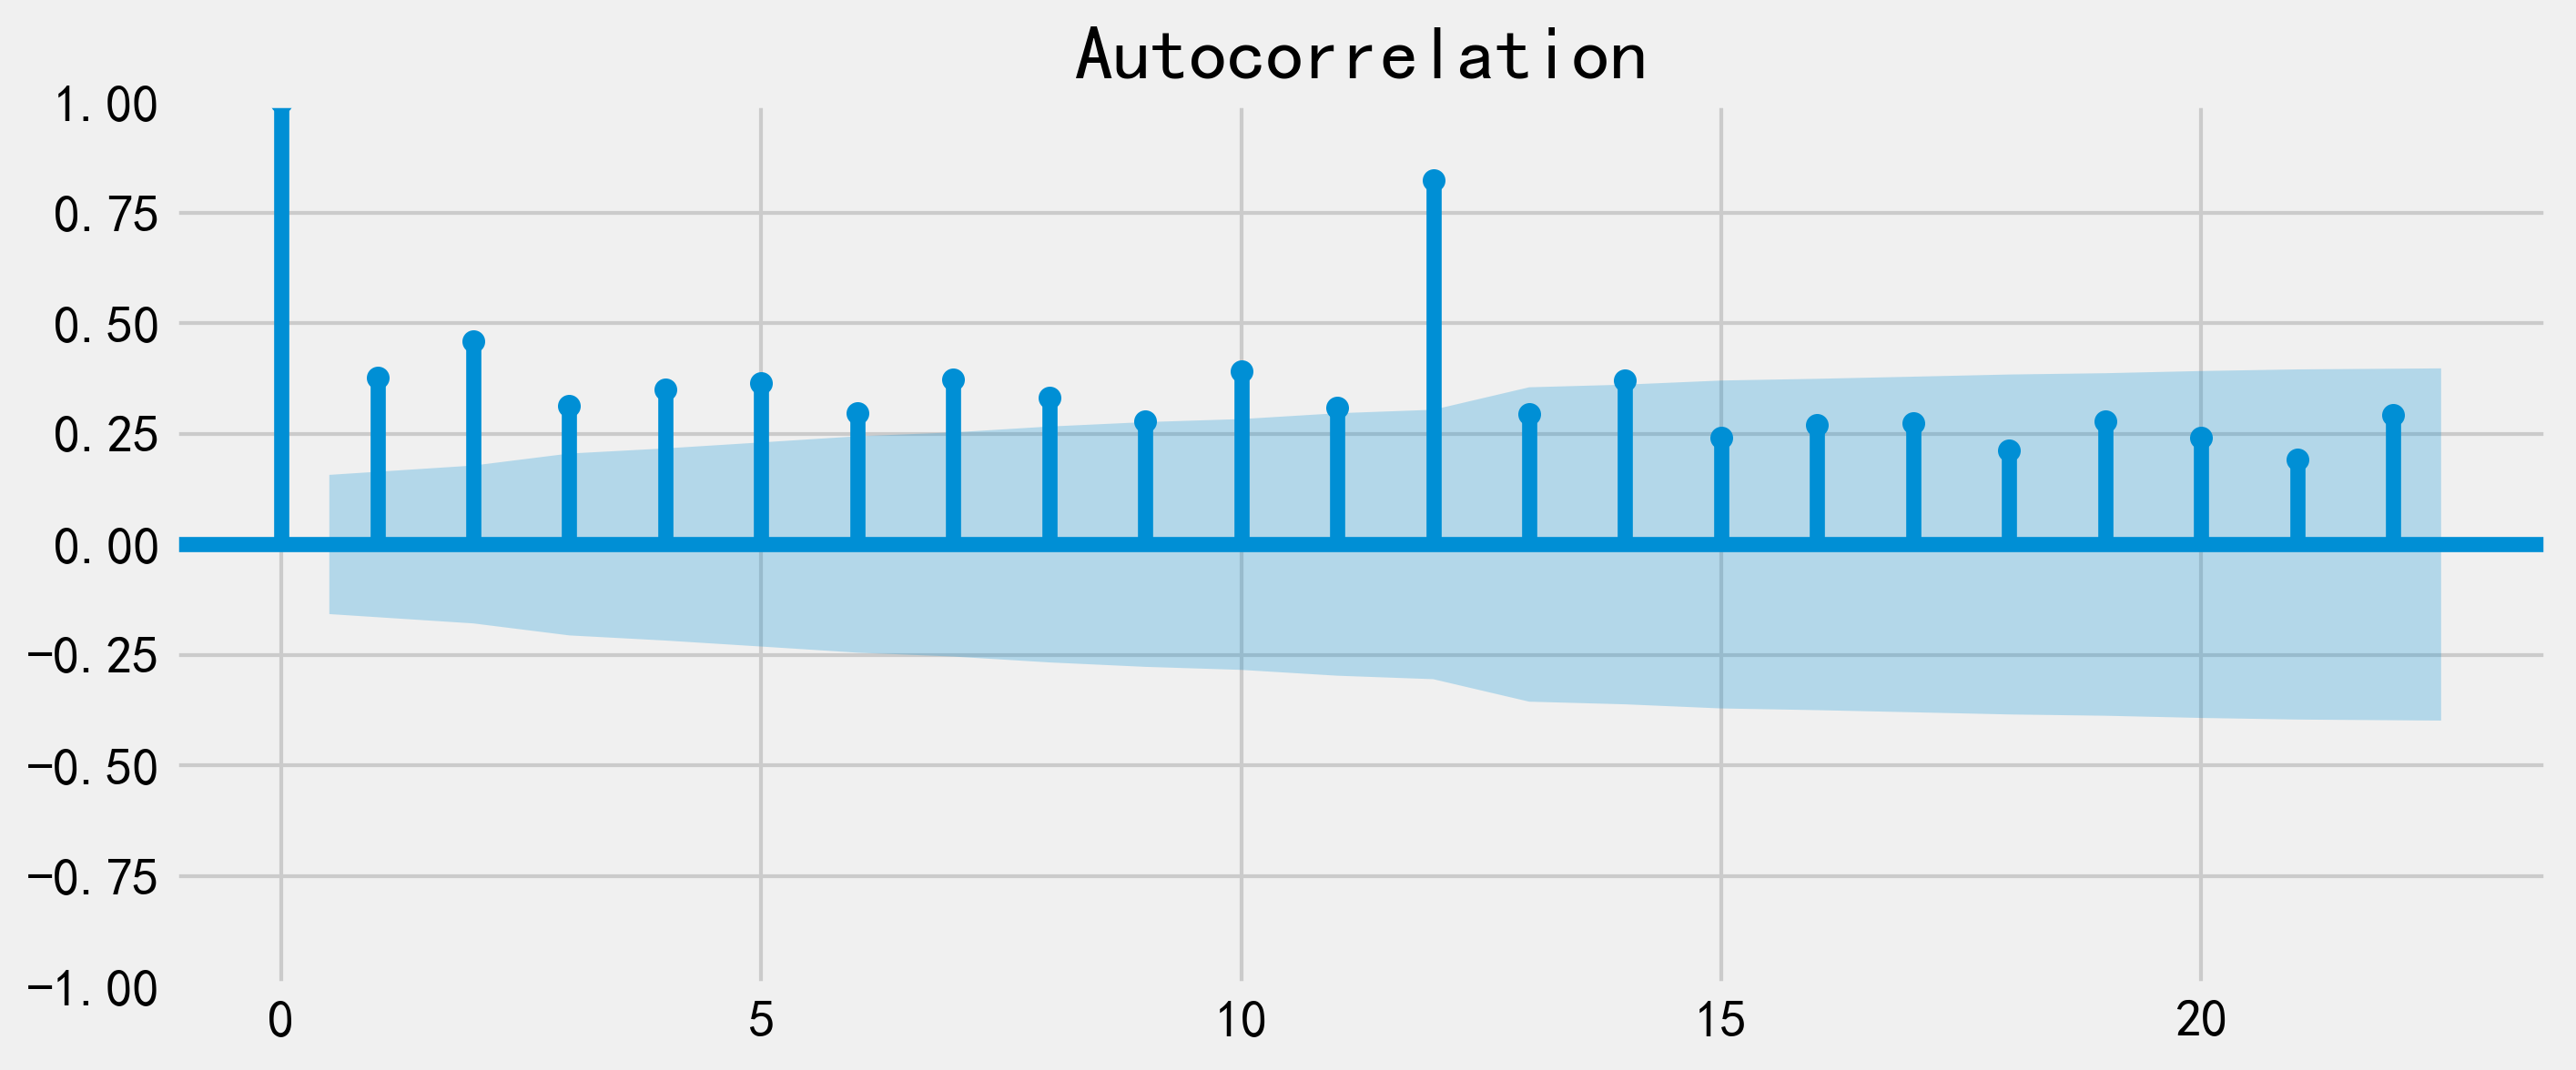

In [30]:
fig,ax=plt.subplots(figsize=(10,4),dpi=300)
plot_acf(origin_earning['total_earning'],ax=ax)
plt.show()

/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



<function matplotlib.pyplot.show(close=None, block=None)>

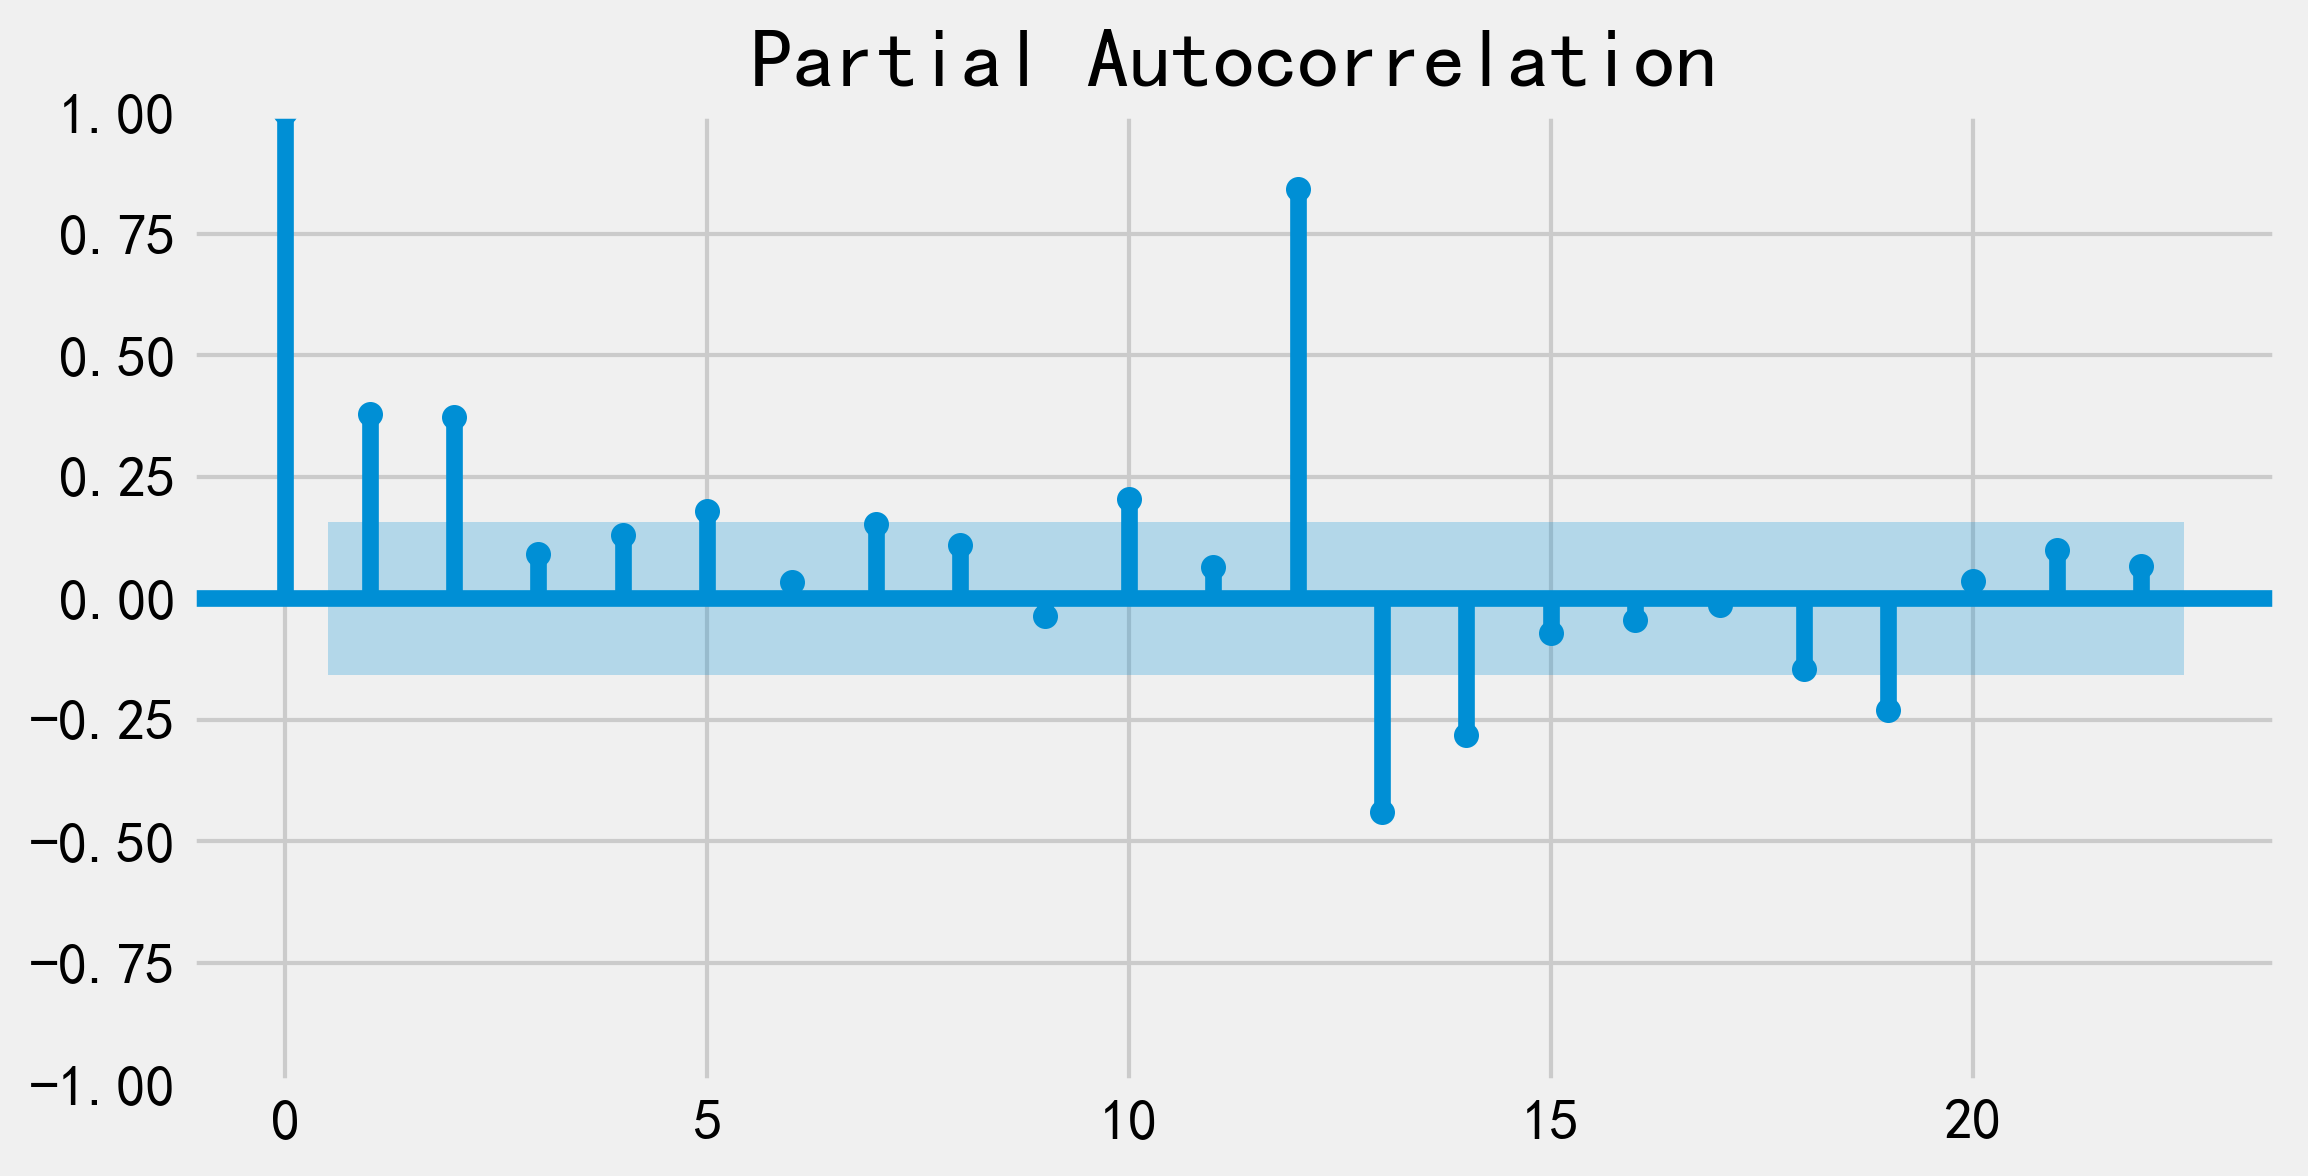

In [41]:
fig,ax=plt.subplots(figsize=(8,4),dpi=300)

plot_pacf(origin_earning['total_earning'],ax=ax)
plt.show


Text(0.5, 1.0, 'Total Earning difference')

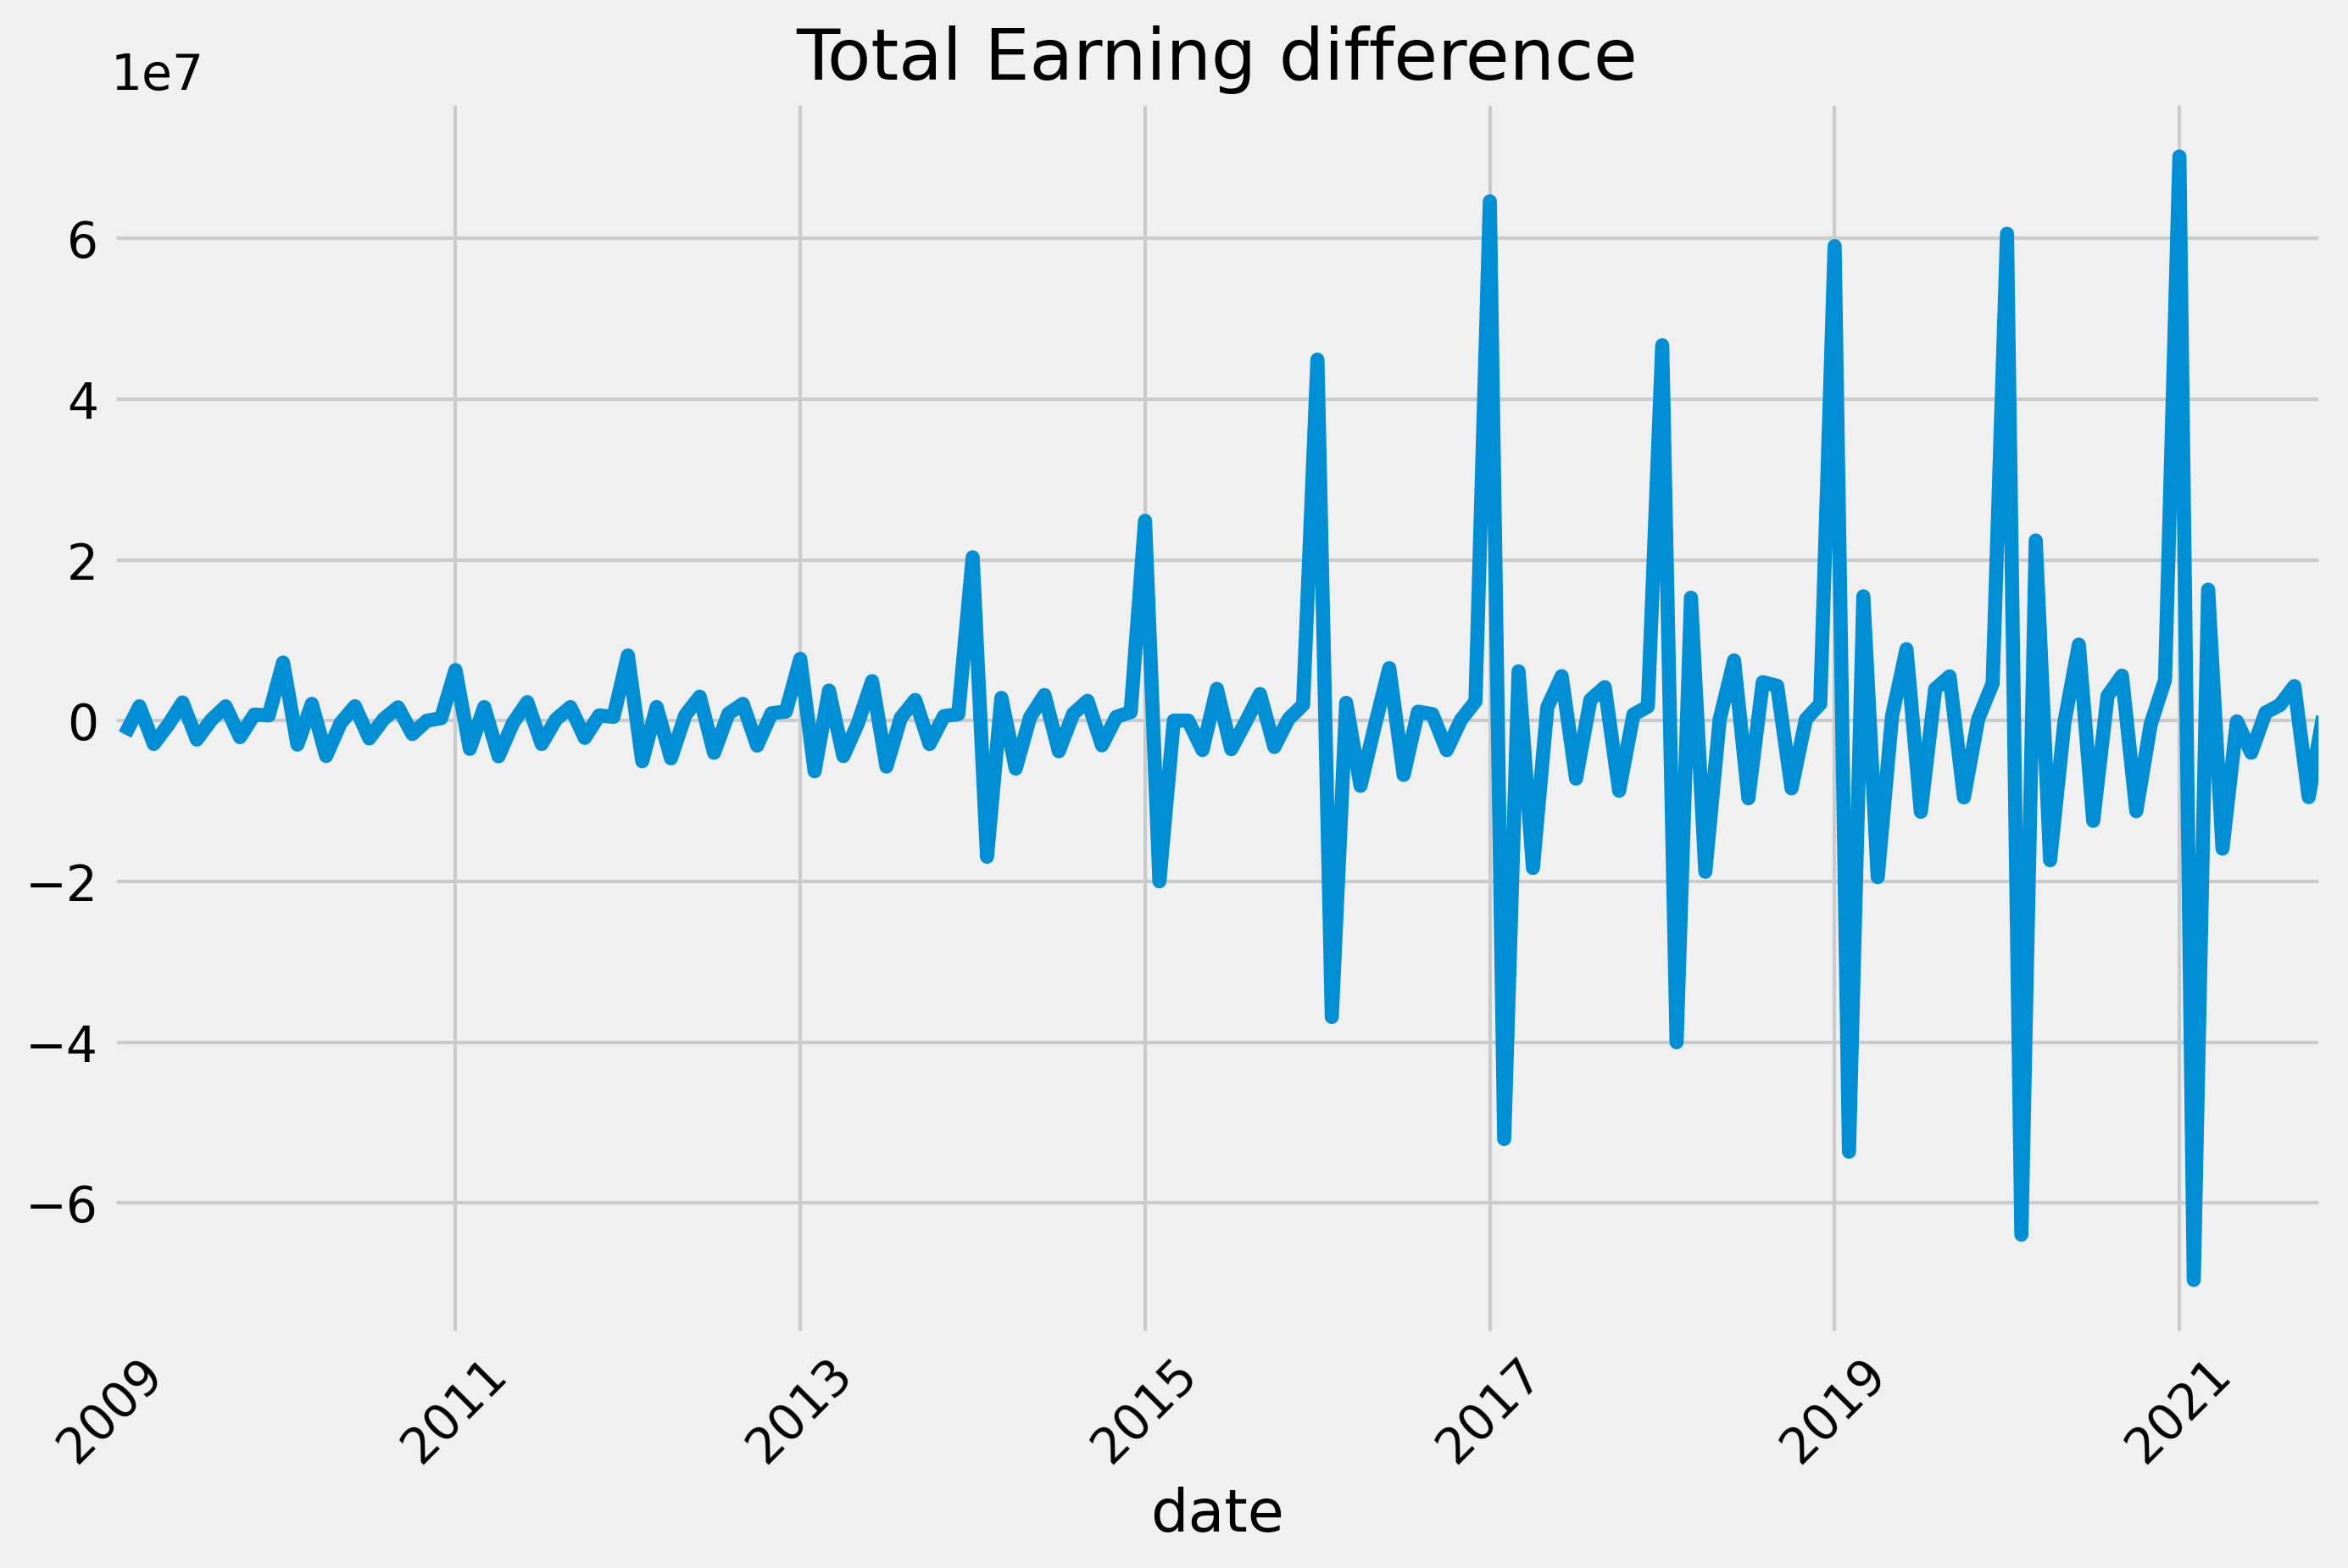

In [56]:
fig,ax=plt.subplots(figsize=(10,6),dpi=300)
(origin_earning.total_earning.diff()).plot(ax=ax,rot=45)
ax.set_title("Total Earning difference")


/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



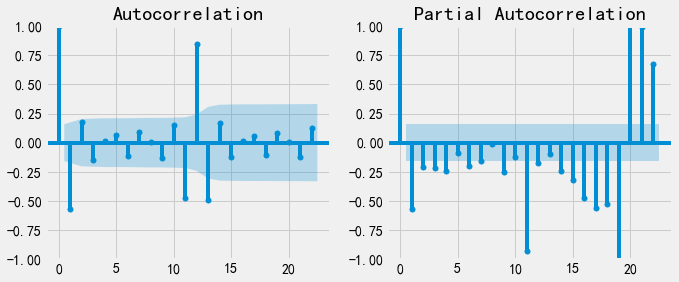

In [66]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
plot_acf(origin_earning['total_earning'].diff().dropna(),ax=ax1)
plot_pacf(origin_earning['total_earning'].diff().dropna(),ax=ax2);

/home/frank/miniconda3/envs/mypy/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



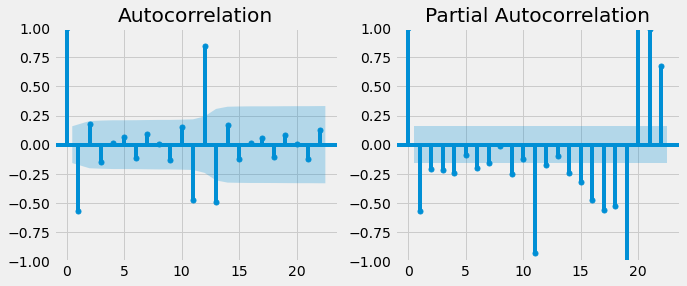

In [30]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
plot_acf(origin_earning['total_earning'].diff().dropna(),ax=ax1)
plot_pacf(origin_earning['total_earning'].diff().dropna(),ax=ax2);

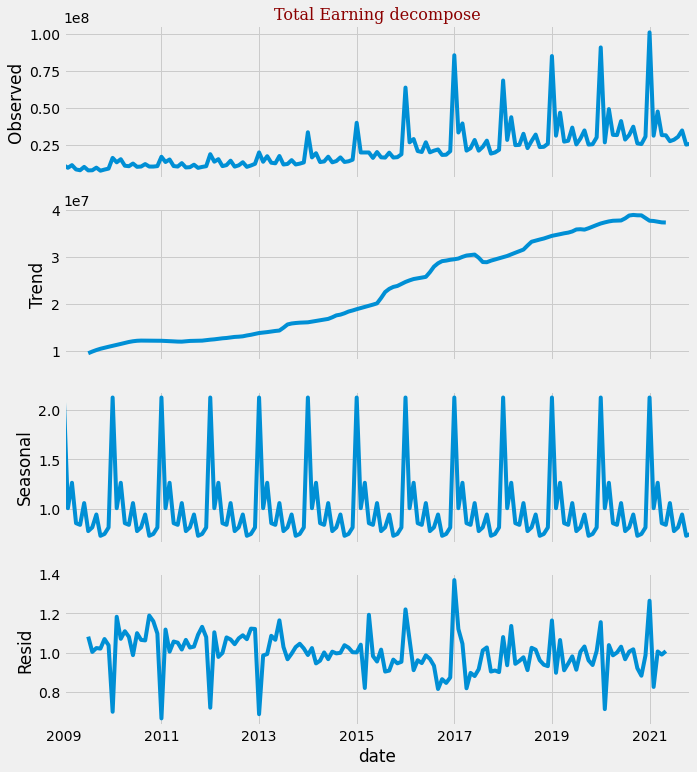

In [45]:
decomposition_mul = seasonal_decompose(origin_earning.total_earning, model = 'multiplicative')

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(10, 12), sharex=True)
font = {'family': 'serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 16,
        }

def plot_decompose(result, ax,  title, fontdict=font):
    ax[0].set_title(title, fontdict=fontdict)
    result.observed.plot(ax=ax[0])
    ax[0].set_ylabel("Observed")

    result.trend.plot(ax=ax[1])
    ax[1].set_ylabel("Trend")

    result.seasonal.plot(ax=ax[2])
    ax[2].set_ylabel("Seasonal")

    result.resid.plot(ax=ax[3])
    ax[3].set_ylabel("Resid")

plot_decompose(result=decomposition_mul, ax=ax, title="Total Earning decompose")
plt.show()

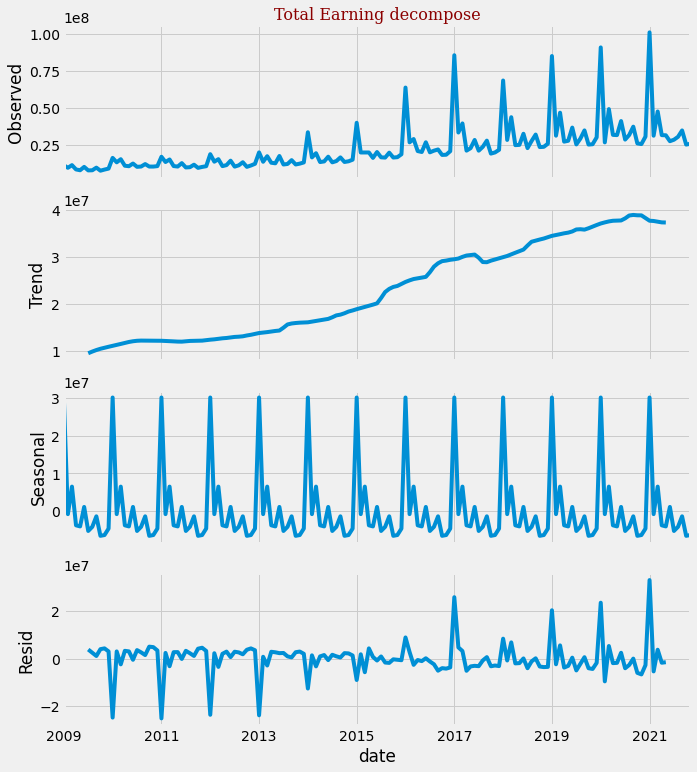

In [50]:
decomposition_mul = seasonal_decompose(origin_earning.total_earning, model = 'addictive')

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(10, 12), sharex=True)
font = {'family': 'serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 16,
        }

def plot_decompose(result, ax,  title, fontdict=font):
    ax[0].set_title(title, fontdict=fontdict)
    result.observed.plot(ax=ax[0])
    ax[0].set_ylabel("Observed")

    result.trend.plot(ax=ax[1])
    ax[1].set_ylabel("Trend")

    result.seasonal.plot(ax=ax[2])
    ax[2].set_ylabel("Seasonal")

    result.resid.plot(ax=ax[3])
    ax[3].set_ylabel("Resid")

plot_decompose(result=decomposition_mul, ax=ax, title="Total Earning decompose")
plt.show()

Text(0.5, 0.98, 'detrended and deseasonality')

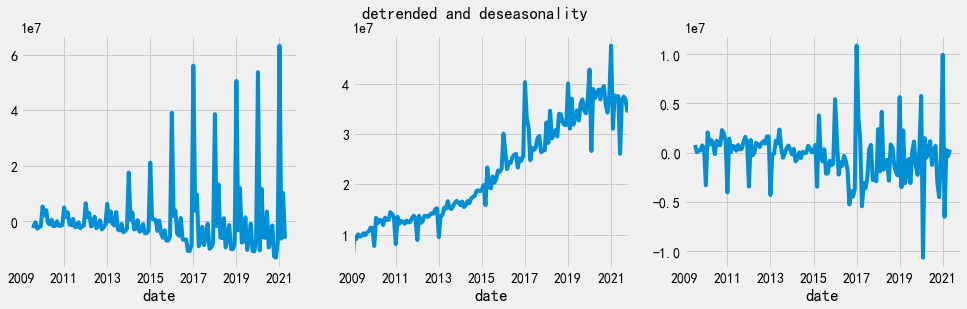

In [56]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
(origin_earning.total_earning - decomposition_mul.trend).plot(ax=ax1)
(origin_earning.total_earning / decomposition_mul.seasonal).plot(ax=ax2)
((origin_earning.total_earning / decomposition_mul.seasonal) - decomposition_mul.trend).plot(ax=ax3)
plt.suptitle("detrended and deseasonality")

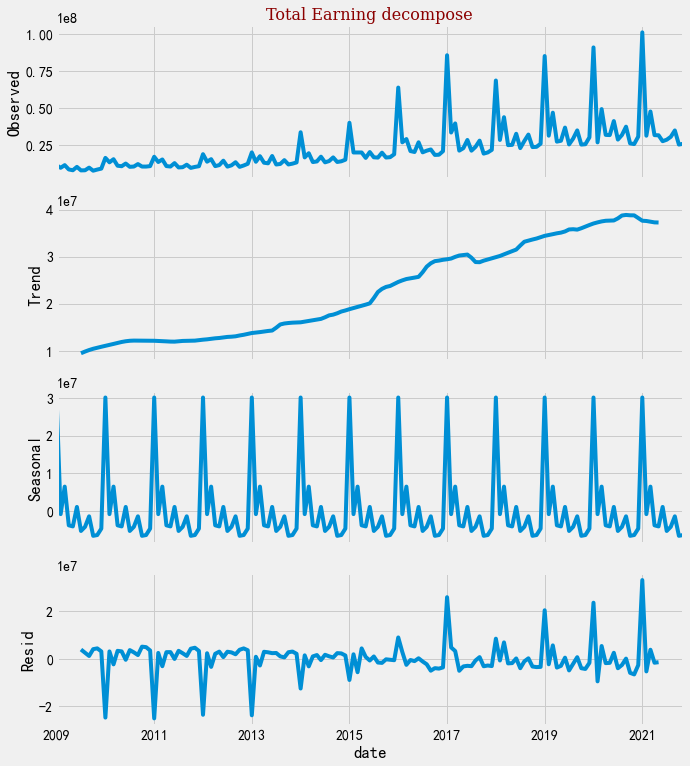

In [33]:
decomposition_add = seasonal_decompose(origin_earning.total_earning, model = 'addictive')

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(10, 12), sharex=True)
font = {'family': 'serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 16,
        }

def plot_decompose(result, ax,  title, fontdict=font):
    ax[0].set_title(title, fontdict=fontdict)
    result.observed.plot(ax=ax[0])
    ax[0].set_ylabel("Observed")

    result.trend.plot(ax=ax[1])
    ax[1].set_ylabel("Trend")

    result.seasonal.plot(ax=ax[2])
    ax[2].set_ylabel("Seasonal")

    result.resid.plot(ax=ax[3])
    ax[3].set_ylabel("Resid")

plot_decompose(result=decomposition_add, ax=ax, title="Total Earning decompose")
plt.show()

Text(0.5, 1.0, 'percentage change in Total Earning')

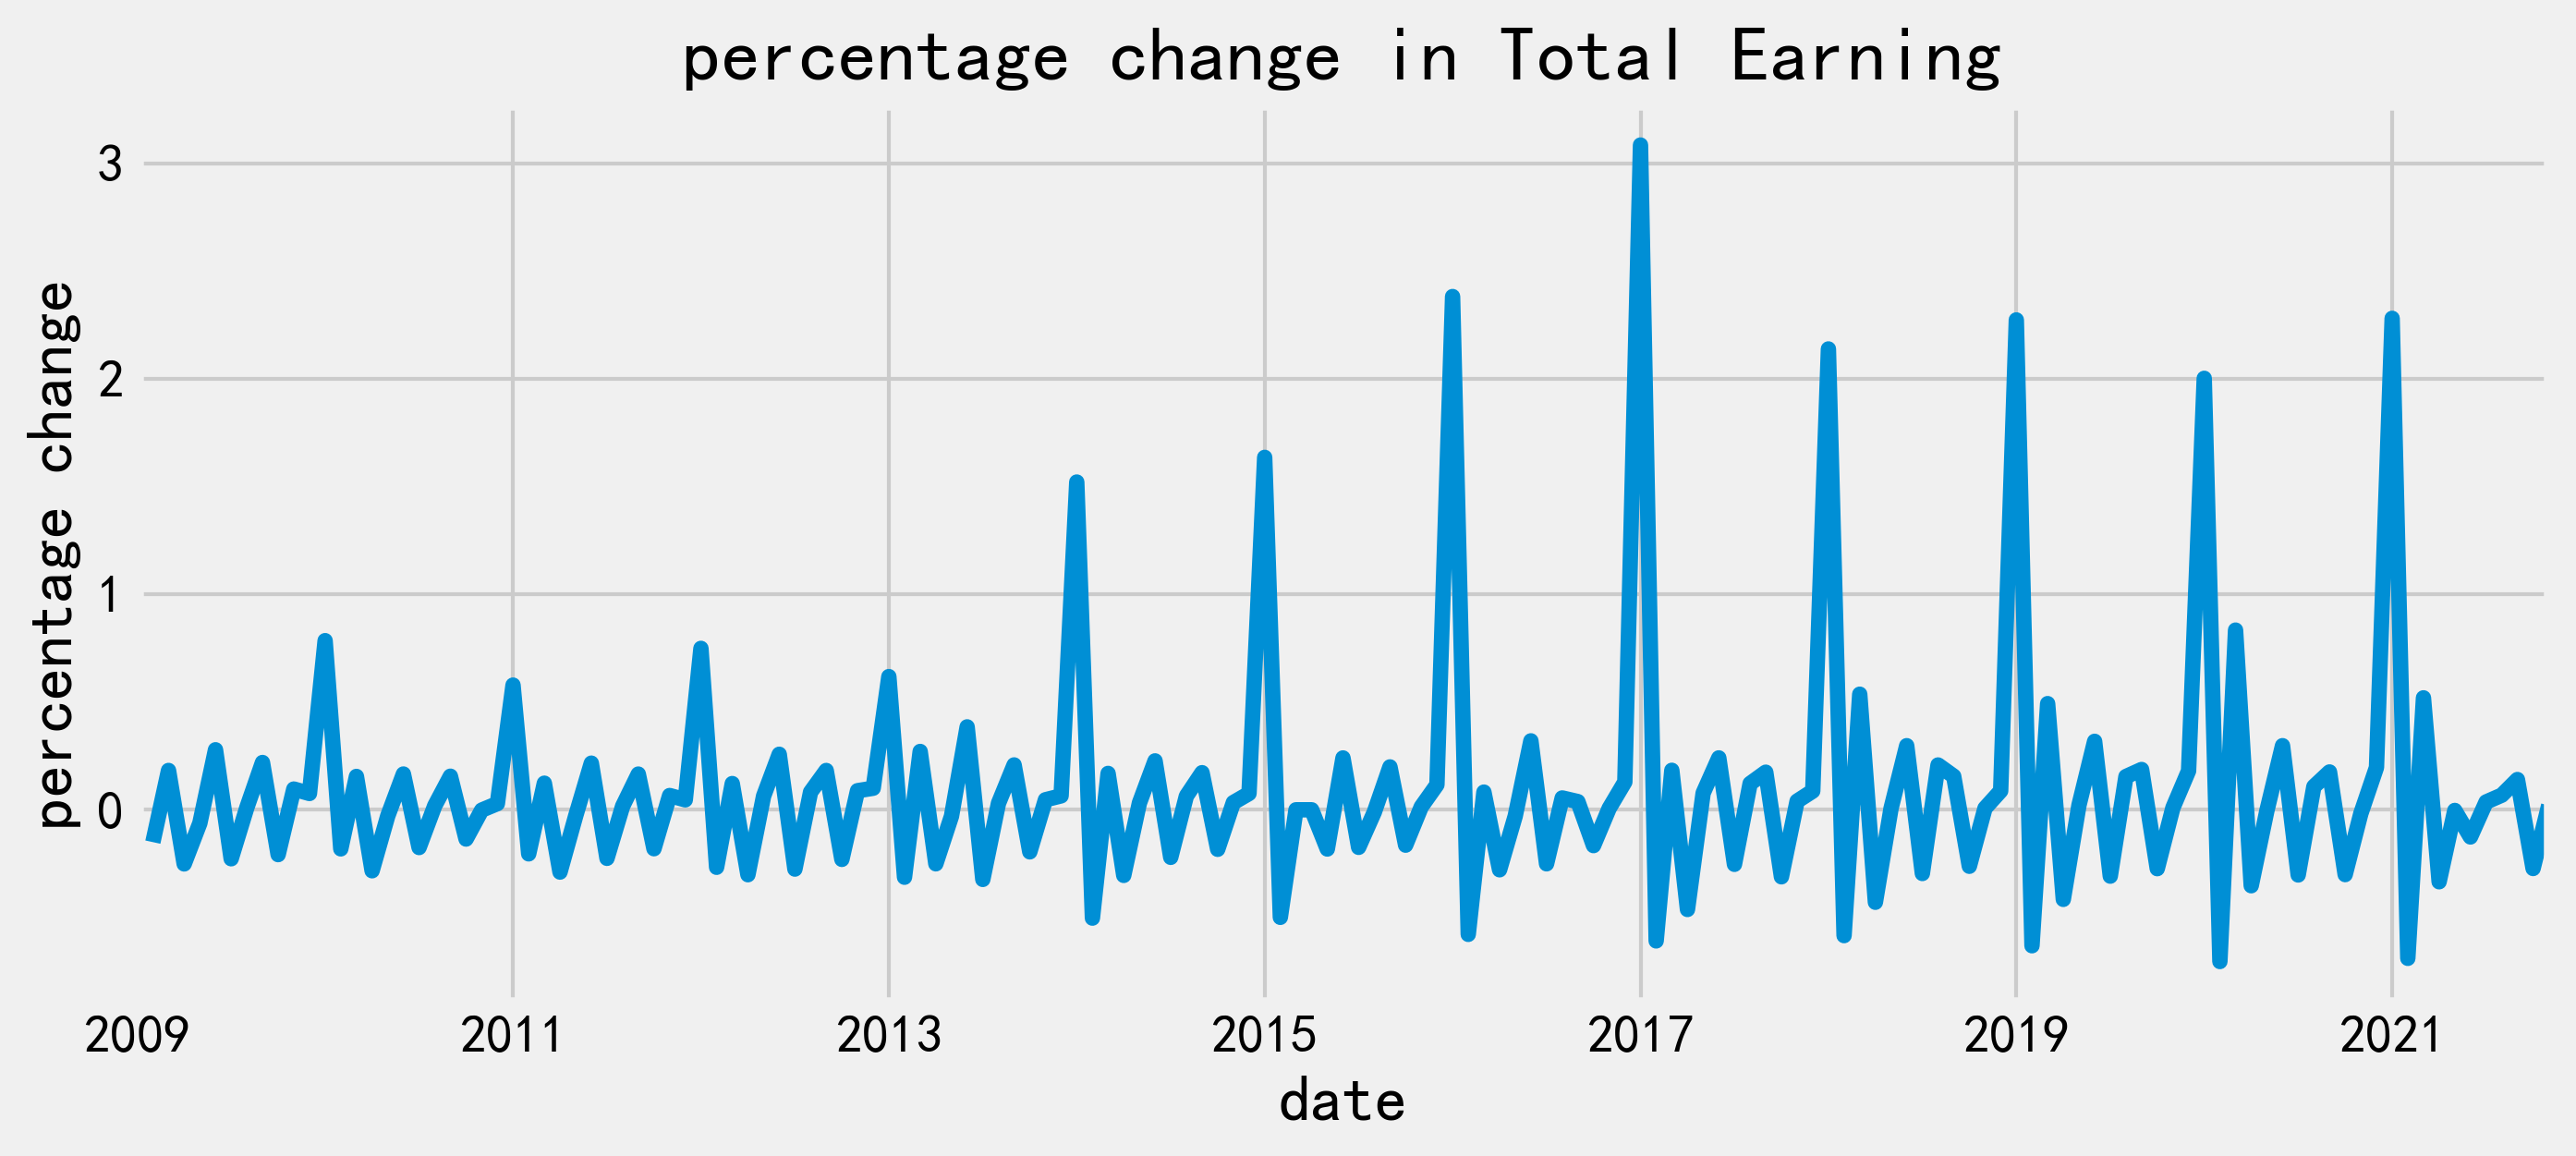

In [35]:
fig,ax=plt.subplots(figsize=(10,4),dpi=300)

origin_earning.total_earning.pct_change().plot(ax=ax)
ax.set_ylabel("percentage change")
ax.set_title("percentage change in Total Earning")

In [59]:
adfuller_res = adfuller(origin_earning.total_earning)
print(f'ADF Statistic: {adfuller_res[0]}')
print(f'p-value: {adfuller_res[1]}')
for key, value in adfuller_res[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.007588086934297115
p-value: 0.9591551348703713
Critial Values:
   1%, -3.477261624048995
Critial Values:
   5%, -2.8821181874544233
Critial Values:
   10%, -2.5777431104939494


<AxesSubplot:xlabel='date'>

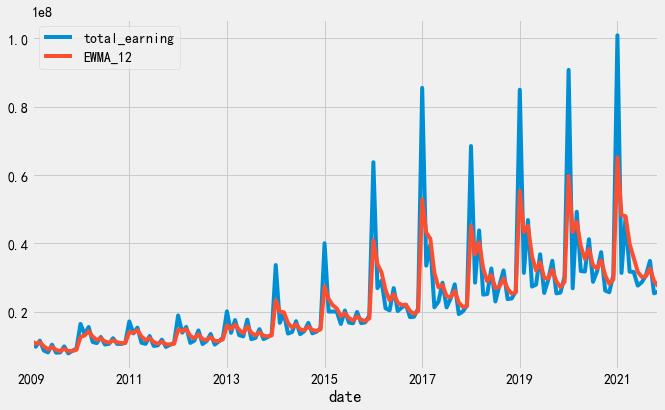

In [40]:
origin_earning['EWMA_12']=origin_earning['total_earning'].ewm(span=3,adjust=False).mean()
origin_earning[['total_earning','EWMA_12']].plot(figsize=(10,6))

/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



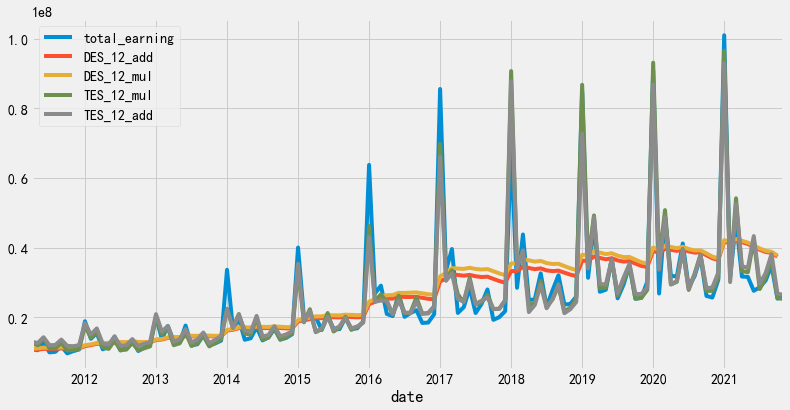

In [44]:
#Setting the index frequency directly to monthly start, thus statsmodels does not need to infer it.
origin_earning.index.freq = 'MS'
origin_earning['DES_12_add'] = ExponentialSmoothing(origin_earning['total_earning'],trend='add').fit().fittedvalues.shift(-1)
origin_earning['DES_12_mul'] = ExponentialSmoothing(origin_earning['total_earning'],trend='mul').fit().fittedvalues.shift(-1)
origin_earning['TES_12_add'] = ExponentialSmoothing(origin_earning['total_earning'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
origin_earning['TES_12_mul'] = ExponentialSmoothing(origin_earning['total_earning'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
origin_earning[['total_earning','DES_12_add','DES_12_mul','TES_12_mul','TES_12_add']].iloc[-128:].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

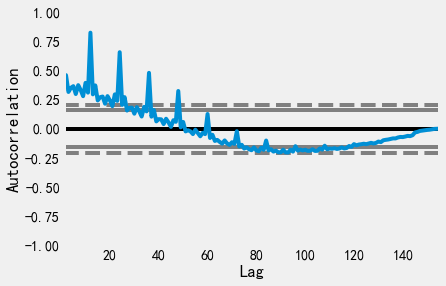

In [58]:
autocorrelation_plot(origin_earning['total_earning'])

In [76]:
model = ARIMA(origin_earning['total_earning'],order=(12,1,2))
model_fit = model.fit()
print(model_fit.summary())

/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          total_earning   No. Observations:                  155
Model:                ARIMA(12, 1, 2)   Log Likelihood               -2573.587
Date:                Tue, 15 Feb 2022   AIC                           5177.174
Time:                        22:03:32   BIC                           5222.728
Sample:                    01-01-2009   HQIC                          5195.678
                         - 11-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0383      0.052     -0.735      0.463      -0.140       0.064
ar.L2         -0.0245      0.052     -0.473      0.636      -0.126       0.077
ar.L3         -0.0310      0.047     -0.655      0.5

/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



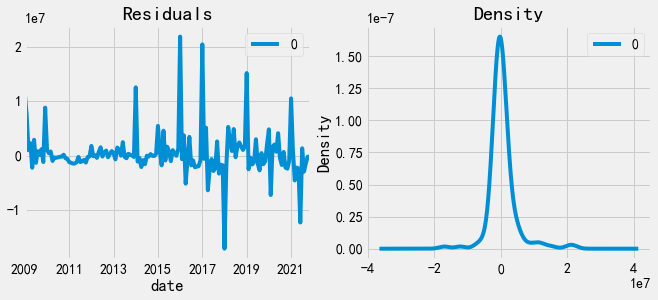

In [77]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(10,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [78]:
model = ARIMA(origin_earning['total_earning'],order=(12,1,1))
model_fit = model.fit()
print(model_fit.summary())

/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:          total_earning   No. Observations:                  155
Model:                ARIMA(12, 1, 1)   Log Likelihood               -2574.191
Date:                Tue, 15 Feb 2022   AIC                           5176.381
Time:                        22:03:47   BIC                           5218.899
Sample:                    01-01-2009   HQIC                          5193.652
                         - 11-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0566      0.066     -0.857      0.392      -0.186       0.073
ar.L2         -0.0539      0.066     -0.819      0.413      -0.183       0.075
ar.L3         -0.0600      0.057     -1.046      0.2

/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



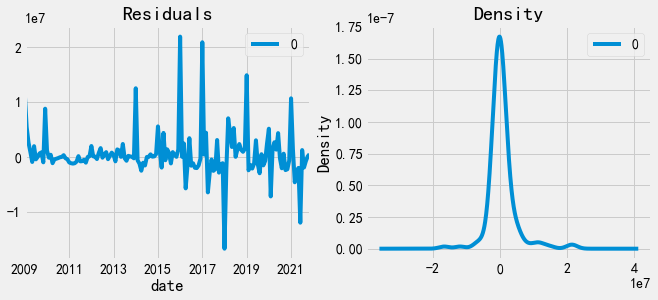

In [79]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2,figsize=(10,4))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [80]:
model_fit.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

<AxesSubplot:xlabel='ds'>

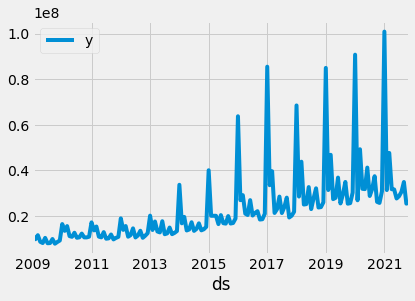

In [58]:
df = origin_earning['total_earning'].reset_index()
df = df.rename(columns={'date':'ds','total_earning':'y'})
df.set_index('ds').plot()

In [21]:
Prophet?

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
)
Docstring:     
Prophet forecaster.

Parameters
----------
growth: String 'linear' or 'logistic' to specify a linear or logistic
    trend.
changepoints: List of dates at which to include potential changepoints. If
    not specified, potential changepoints are selected automatically.
n_changepoints: Number of potential changepoints to include. Not used
    if input `changepoints` is supplied. If `changepoints` is not supplied,
    then n_changepoints potential changepoints are selected uniformly from
    the first `changepoint_range`

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fi



Gradient evaluation took 0.000171 secondsGradient evaluation took 0.000133 seconds



1000 transitions using 10 leapfrog steps per transition would take 1.33 seconds.
1000 transitions using 10 leapfrog steps per transition would take 1.71 seconds.
Adjust your expectations accordingly!Adjust your expectations accordingly!





Gradient evaluation took 0.000127 seconds
Gradient evaluation took 0.000126 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.27 seconds.
Adjust your expectations accordingly!WARNING: No variance estimation is
1000 transitions using 10 leapfrog steps per transition would take 1.26 seconds.


         performed for num_warmup < 20


Adjust your expectations accordingly!


         performed for num_warmup < 20

         performed for num_warmup < 20

         performed for num_warmup < 20

Iteration: 1 / 10 [ 10%]  (Warmup)
Iteration: 1 / 10 [ 10%]  (Warmup)
Iteration: 1 / 10 [ 10%]  (Warmup)
Iteration: 1 / 10 [ 10%]  (Warmup)
Iteration

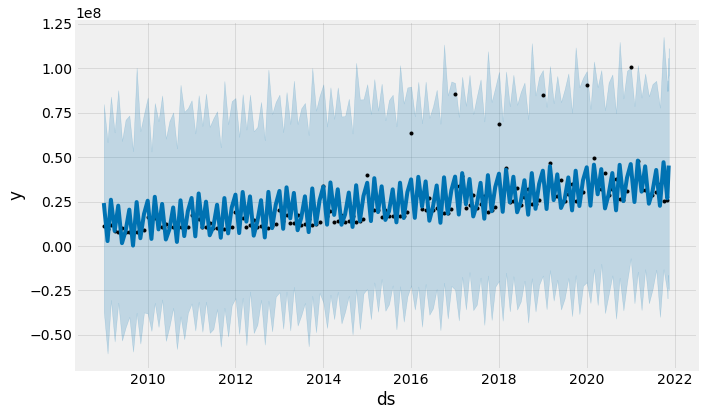

In [22]:
m = Prophet(mcmc_samples=10)
m.fit(df)
future = m.make_future_dataframe(periods=12)
forecast = m.predict(future)
fig = m.plot(forecast)



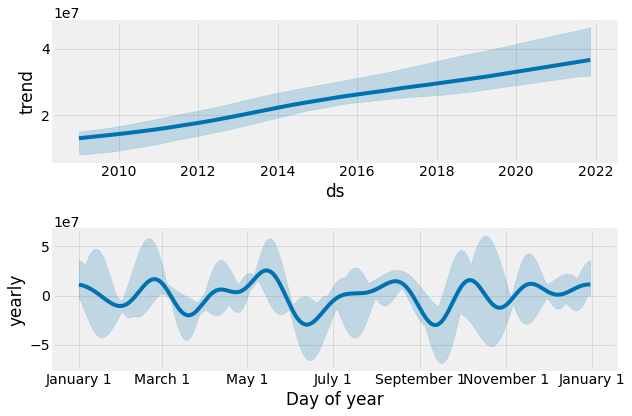

In [24]:
m.plot_components(forecast);

In [26]:
forecast[-12:]

ds         trend    yhat_lower    yhat_upper   trend_lower  \
155 2021-11-02  3.651400e+07 -2.816463e+07  8.710430e+07  3.185130e+07   
156 2021-11-03  3.651926e+07 -2.947688e+07  9.317092e+07  3.185381e+07   
157 2021-11-04  3.652451e+07 -2.534823e+07  8.736840e+07  3.185632e+07   
158 2021-11-05  3.652977e+07 -1.890375e+07  8.815827e+07  3.185884e+07   
159 2021-11-06  3.653503e+07 -2.362979e+07  9.685152e+07  3.186135e+07   
160 2021-11-07  3.654029e+07 -1.770532e+07  9.469821e+07  3.186386e+07   
161 2021-11-08  3.654554e+07 -1.629073e+07  1.009294e+08  3.186637e+07   
162 2021-11-09  3.655080e+07 -1.775894e+07  9.981257e+07  3.186888e+07   
163 2021-11-10  3.655606e+07 -2.013099e+07  1.058146e+08  3.187139e+07   
164 2021-11-11  3.656132e+07 -2.052988e+07  9.570951e+07  3.187390e+07   
165 2021-11-12  3.656657e+07 -2.472859e+07  1.022774e+08  3.187641e+07   
166 2021-11-13  3.657183e+07 -2.374646e+07  1.113065e+08  3.187892e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
155  4.628075e+07   -8.421537e+06         -2.509452e+07          9.505695e+06   
156  4.628801e+07   -7.027609e+06         -2.089122e+07          4.755965e+06   
157  4.629527e+07   -5.495851e+06         -1.658182e+07          1.438865e+05   
158  4.630253e+07   -3.861330e+06         -1.222826e+07          7.588315e+05   
159  4.630979e+07   -2.160387e+06         -8.451660e+06          6.047584e+06   
160  4.631705e+07   -4.297699e+05         -1.233463e+07          1.165623e+07   
161  4.632430e+07    1.294222e+06         -1.588061e+07          1.702844e+07   
162  4.633156e+07    2.976562e+06         -1.905035e+07          2.207294e+07   
163  4.633882e+07    4.584270e+06         -2.181037e+07          2.670664e+07   
164  4.634608e+07    6.087116e+06         -2.413368e+07          3.085624e+07   
165  4.635334e+07    7.458244e+06         -2.600032e+07          3.445961e+07   
166  4.636060e+07    8.674689e+06         -2.739784e+07          3.746694e+07   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
155 -8.421537e+06 -2.509452e+07  9.505695e+06                   0.0   
156 -7.027609e+06 -2.089122e+07  4.755965e+06                   0.0   
157 -5.495851e+06 -1.658182e+07  1.438865e+05                   0.0   
158 -3.861330e+06 -1.222826e+07  7.588315e+05                   0.0   
159 -2.160387e+06 -8.451660e+06  6.047584e+06                   0.0   
160 -4.297699e+05 -1.233463e+07  1.165623e+07                   0.0   
161  1.294222e+06 -1.588061e+07  1.702844e+07                   0.0   
162  2.976562e+06 -1.905035e+07  2.207294e+07                   0.0   
163  4.584270e+06 -2.181037e+07  2.670664e+07                   0.0   
164  6.087116e+06 -2.413368e+07  3.085624e+07                   0.0   
165  7.458244e+06 -2.600032e+07  3.445961e+07                   0.0   
166  8.674689e+06 -2.739784e+07  3.746694e+07                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
155                         0.0                         0.0  2.809246e+07  
156                         0.0                         0.0  2.949165e+07  
157                         0.0                         0.0  3.102866e+07  
158                         0.0                         0.0  3.266844e+07  
159                         0.0                         0.0  3.437464e+07  
160                         0.0                         0.0  3.611052e+07  
161                         0.0                         0.0  3.783977e+07  
162                         0.0                         0.0  3.952736e+07  
163                         0.0                         0.0  4.114033e+07  
164                         0.0                         0.0  4.264843e+07  
165                         0.0                         0.0  4.402482e+07  
166                         0.0                         0.0  4.524652e+07

In [59]:
df

ds           y
0   2009-01-01  11476413.2
1   2009-02-01   9755257.4
2   2009-03-01  11535355.0
3   2009-04-01   8637567.7
4   2009-05-01   8100320.6
..         ...         ...
150 2021-07-01  28655300.0
151 2021-08-01  30600700.0
152 2021-09-01  34898000.0
153 2021-10-01  25389600.0
154 2021-11-01  25907500.0

[155 rows x 2 columns]

In [61]:
xtrain, xvalid = model_selection.train_test_split(df.set_index('ds'), test_size = 12)


In [64]:
pipe = pipeline.Pipeline([
    ("fourier", ppc.FourierFeaturizer(m=12)),
    ("arima", arima.AutoARIMA(stepwise=True, trace=1, error_action="ignore",
                              seasonal=False,  # because we use Fourier
                              suppress_warnings=True))
])

pipe.fit(xtrain)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4894.527, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4968.924, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4930.839, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4901.857, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5529.801, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4903.525, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4897.182, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4873.164, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4869.305, Time=0.33 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=4918.130, Time=0.17 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=4905.835, T

Pipeline(steps=[('fourier', FourierFeaturizer(m=12)),
                ('arima',
                 AutoARIMA(error_action='ignore', seasonal=False, trace=1))])

In [65]:
pipe.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -2414.652
Date:                Sat, 12 Mar 2022   AIC                           4869.305
Time:                        22:21:18   BIC                           4928.421
Sample:                             0   HQIC                          4893.327
                                - 143                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      1.378e+06   3.03e-08   4.54e+13      0.000    1.38e+06    1.38e+06
FOURIER_S12-0  5.195e+06   5.99e-09   8.67e+14      0.000    5.19e+06    5.19e+06
FOURIER_C12-0  3.032e+06   1.01e-08   2.99e+14      0.000    3.03e+06    3.03e+06
FOURIER_S12-1  5.297e+06   8.74e-09   6.06e+14      0.000     5.3e+06     5.3e+06
FOURIER_C12-1  4.314e+05   6.33e-09   6.81e+13      0.000    4.31e+05    4.31e+05
FOURIER_S12-2  4.434e+06   8.41e-09   5.27e+14      0.000    4.43e+06    4.43e+06
FOURIER_C12-2 -1.226e+06   4.87e-09  -2.52e+14      0.000   -1.23e+06   -1.23e+06
FOURIER_S12-3   3.65e+06   7.04e-09   5.18e+14      0.000    3.65e+06    3.65e+06
FOURIER_C12-3  3.323e+05   7.25e-09   4.59e+13      0.000    3.32e+05    3.32e+05
FOURIER_S12-4  3.146e+06    4.4e-09   7.14e+14      0.000    3.15e+06    3.15e+06
FOURIER_C12-4 -5.081e+06   4.33e-09  -1.17e+15      0.000   -5.08e+06   -5.08e+06
FOURIER_S12-5 -5.532e+11   3.06e-13  -1.81e+24      0.000   -5.53e+11   -5.53e+11
FOURIER_C12-5  7.078e+05   3.49e-08   2.03e+13      0.000    7.08e+05    7.08e+05
ar.L1            -1.7448      0.011   -154.492      0.000      -1.767      -1.723
ar.L2            -0.9911      0.009   -105.779      0.000      -1.009      -0.973
ma.L1             1.2328      0.072     17.137      0.000       1.092       1.374
ma.L2            -0.2858      0.103     -2.786      0.005      -0.487      -0.085
ma.L3            -1.0672      0.090    -11.921      0.000      -1.243      -0.892
ma.L4            -0.3261      0.065     -4.993      0.000      -0.454      -0.198
sigma2         2.653e+13   3.07e-15   8.63e+27      0.000    2.65e+13    2.65e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               131.25
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                             0.72
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.22e+41. Standard errors may be unstable.
"""